<a href="https://colab.research.google.com/github/Harbhajan-Kaur/final_project_Harbhajan_Kaur/blob/main/Kaggle_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle #install kaggle library

In [2]:
from google.colab import drive
drive.mount('/content/drive')   #connect to google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! mkdir ~/.kaggle #directory name kaggle

In [4]:
!cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/  #copy token to kaggle(dir)

In [5]:
! chmod 600 ~/.kaggle/kaggle.json #only owner has read and write permission

In [6]:
! kaggle datasets download akashshingha850/mrl-eye-dataset


Dataset URL: https://www.kaggle.com/datasets/akashshingha850/mrl-eye-dataset
License(s): MIT


In [7]:
! unzip mrl-eye-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/val/sleepy/s0013_02688_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02689_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02692_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02693_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02694_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02700_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02710_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02713_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02716_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02726_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02728_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02738_0_1_0_1_0_01.png  
  inflating: data/val/sleepy/s0013_02748_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02755_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02778_0_1_0_0_0_01.png  
  inflating: data/val/sleepy/s0013_02806_0_1_0_0_

In [8]:
# Define paths
train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"

In [9]:
import os #directory operations
import numpy as np #array and matrices
import matplotlib.pyplot as plt #visualization
import tensorflow as tf #lib to build newral networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator #agumentation(fliping,rotating the images)
from tensorflow.keras.models import Sequential # stack of layers where each layer has one input and output
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout #cnn related
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #earlystoping-stoping training if improvement not made,.............

In [ ]:
import cv2

In [ ]:
img_array=cv2.imread("/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)

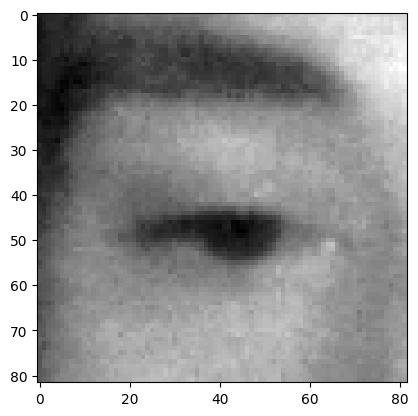

In [ ]:
plt.imshow(img_array,cmap="gray")

In [ ]:


# Load the image
image_path = "/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png"
img = cv2.imread(image_path)

# Get dimensions
height, width, channels = img.shape
print(f"Image size: {width} x {height}, Channels: {channels}")


Image size: 82 x 82, Channels: 3


In [ ]:
img_array=cv2.imread("/content/data/test/sleepy/s0001_00085_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

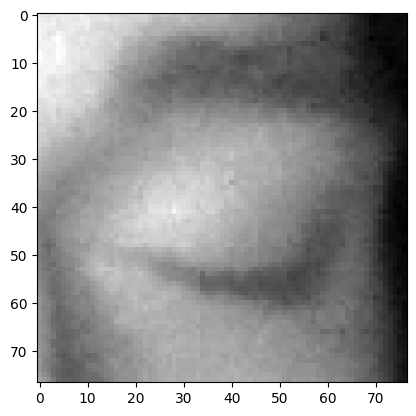

In [ ]:
plt.imshow(img_array,cmap="gray")

In [ ]:

# Load the image
image_path = "/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png"
img = cv2.imread(image_path)

# Get dimensions
height, width, channels = img.shape
print(f"Image size: {width} x {height}, Channels: {channels}")

Image size: 82 x 82, Channels: 3


In [10]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, #rescale pixels from 0to 1
    rotation_range=20, #rotate image to 20 degree
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'    #agumentaion is only applied to training dataset whereas and rescaling is done in both traing and test dataset
)

val_datagen = ImageDataGenerator(rescale=1./255)     # pixel size 0 t0 1
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(               #generators--batch division
    train_dir,
    target_size=(224, 224),  #resize all the images in
    batch_size=32,  #loads images in batches of 32..memory efficency
    class_mode='binary'     #binary classification
)

val_generator = val_datagen.flow_from_directory(        #flow_from_directory() loads images in RGB mode (even if the images are grayscale)
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


In [11]:
# Check image dimensions
print(f"Image shape: {train_generator.image_shape}")

Image shape: (224, 224, 3)


In [ ]:
print("Class indices:", train_generator.class_indices)#.....as per folder names kera automatically assign numbers


Class indices: {'awake': 0, 'sleepy': 1}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter #counts occurance

# Function to plot class distribution
def plot_class_distribution(generator, title): #generator-dataset
    labels = generator.classes                                                           #extract classes
    class_counts = Counter(labels)
    class_names = list(generator.class_indices.keys()) #dictionary ki keys

    plt.figure(figsize=(8, 4))
    sns.barplot(x=class_names, y=[class_counts[i] for i in range(len(class_names))])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

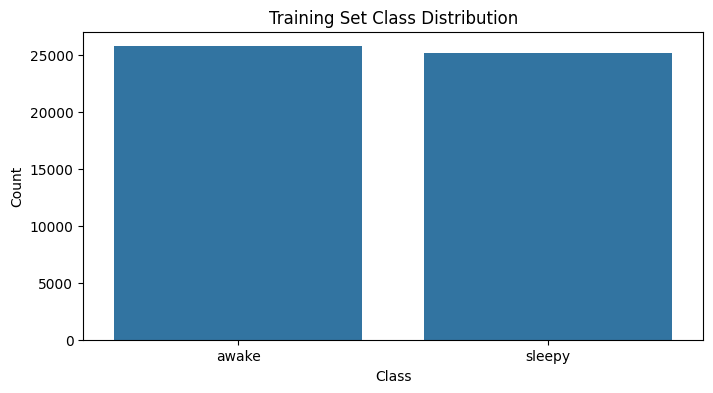

In [ ]:
# Plot class distribution for train set
plot_class_distribution(train_generator, 'Training Set Class Distribution')

<ipython-input-21-aa400471d2a1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=[class_counts[i] for i in class_counts.keys()],


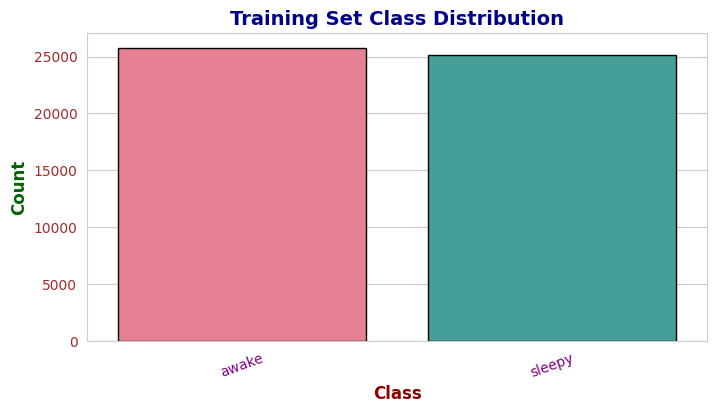

In [ ]:
"""#import matplotlib.pyplot as plt #chatgpt
import seaborn as sns
from collections import Counter

# Function to plot class distribution with colors
def plot_class_distribution(generator, title):
    labels = generator.classes  # Extract class labels
    class_counts = Counter(labels)
    class_names = list(generator.class_indices.keys())  # Get class names

    plt.figure(figsize=(8, 4))
    sns.set_style("whitegrid")  # Improve background style

    # Use a colorful palette
    sns.barplot(x=class_names, y=[class_counts[i] for i in class_counts.keys()],
                palette="husl", edgecolor="black")  # 'husl' gives vibrant colors

    plt.title(title, fontsize=14, fontweight='bold', color='darkblue')  # Title Styling
    plt.xlabel('Class', fontsize=12, fontweight='bold', color='darkred')
    plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkgreen')

    plt.xticks(rotation=20, fontsize=10, color='purple')  # Rotate x-axis labels
    plt.yticks(fontsize=10, color='brown')

    plt.show()

# Plot class distribution for train set
plot_class_distribution(train_generator, 'Training Set Class Distribution')"""


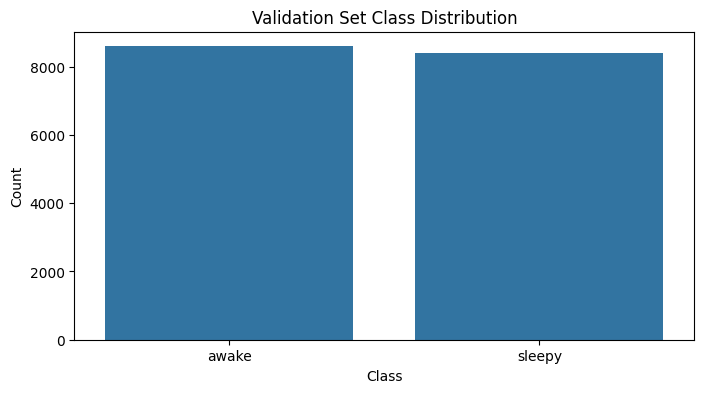

In [ ]:
# Plot class distribution for val set
plot_class_distribution(val_generator, 'Validation Set Class Distribution')

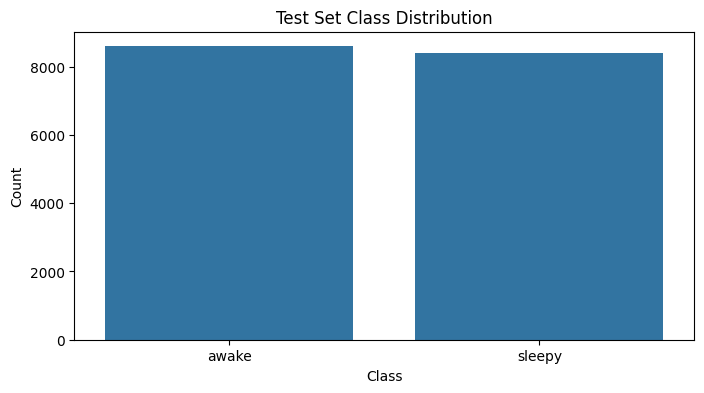

In [ ]:
# Plot class distribution for test set
plot_class_distribution(test_generator, 'Test Set Class Distribution')

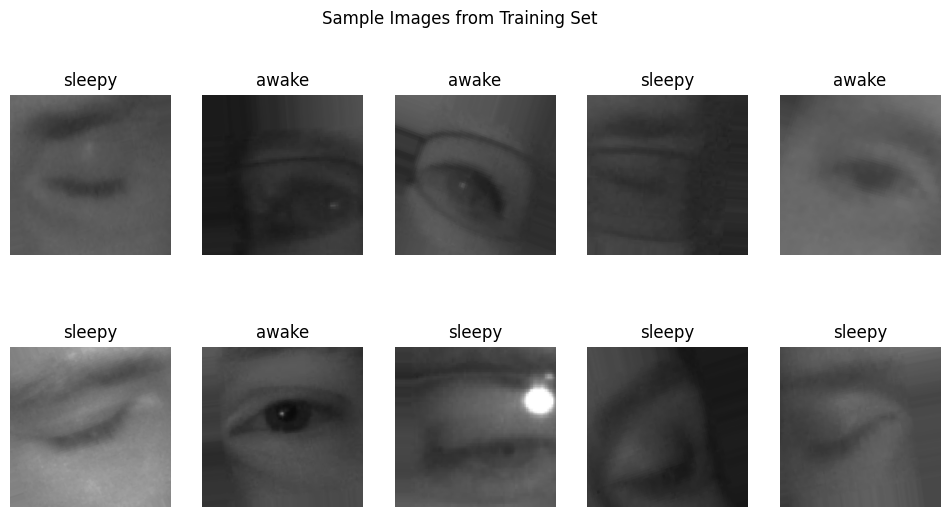

In [ ]:
# Function to plot sample images
import numpy as np
import matplotlib.pyplot as plt

def plot_sample_images(generator, title):
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())

    # Convert one-hot encoded labels to class indices if necessary
    if labels.ndim > 1:  # Check if labels are one-hot encoded
        labels = np.argmax(labels, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])  # Convert to int
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Call the function
plot_sample_images(train_generator, 'Sample Images from Training Set')


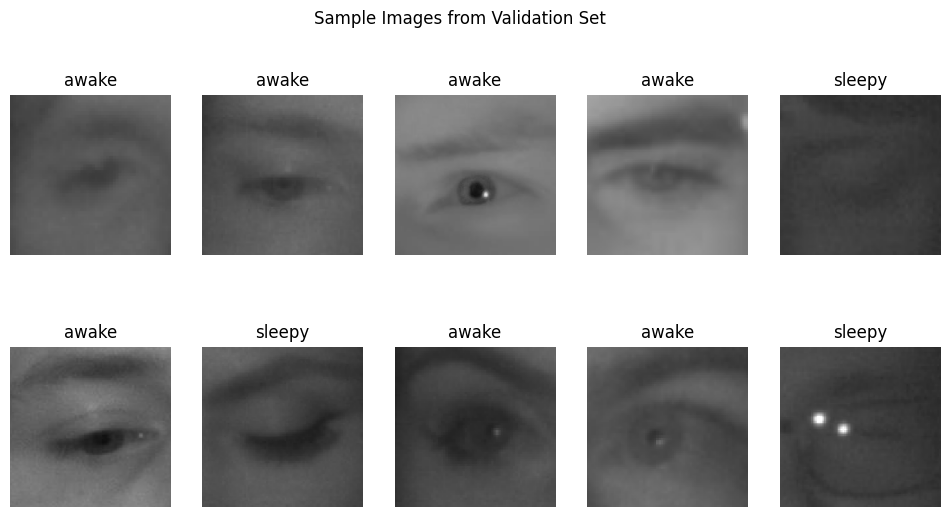

In [ ]:
# Plot sample images from  val set
plot_sample_images(val_generator, 'Sample Images from Validation Set')

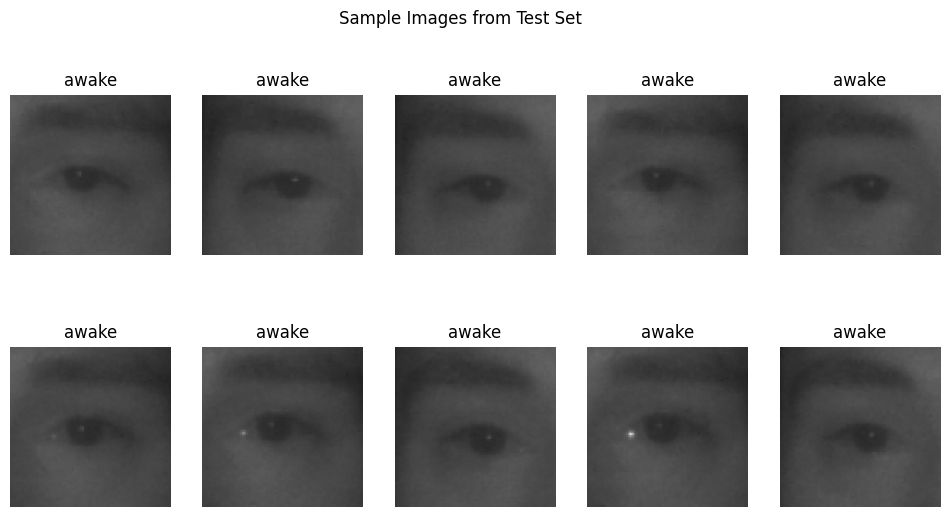

In [ ]:
# Plot sample images from test set
plot_sample_images(test_generator, 'Sample Images from Test Set')

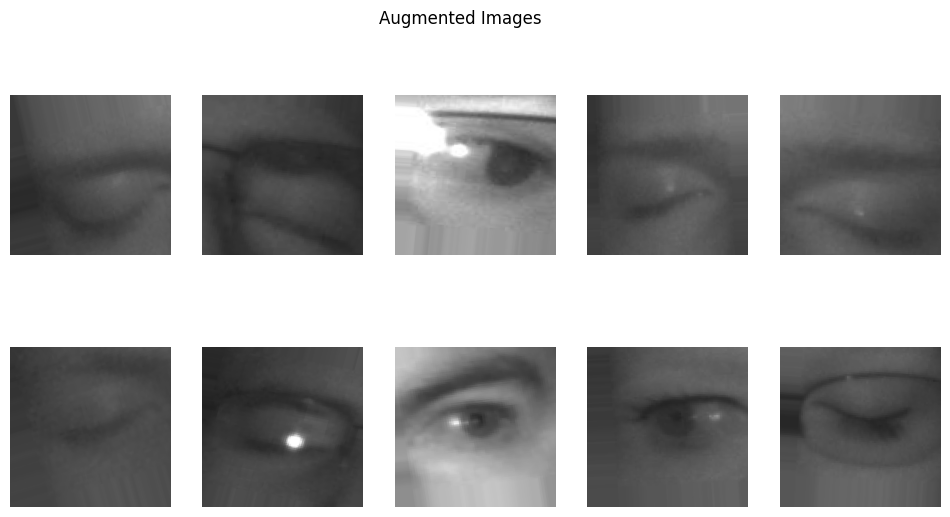

In [ ]:
# Visualize data augmentation effects
augmented_images, _ = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle('Augmented Images')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
#transfer learning-InceptionV3
base_model = InceptionV3(include_top=False, weights= 'imagenet', input_tensor=Input(shape=(224,224,3)))
head_model = base_model.output
head_model = Flatten()(head_model)
head_model = Dense(64, activation='relu')(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(1,activation= 'sigmoid')(head_model)  #1 neuron ayega?

model = Model(inputs=base_model.input, outputs= head_model)
for layer in base_model.layers:
  layer.trainable =False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 25,079,713 (95.67 MB)

 Trainable params: 3,276,929 (12.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
learning_rate = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=3)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model with smaller learning rate
optimizer = Adam(learning_rate=1e-4)  # or o.ooo1
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint,learning_rate])
# Save history
#import pickle
#with open('Inceptionv3.pkl', 'wb') as f:
   # pickle.dump(history.history, f)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 704s 430ms/step - accuracy: 0.8843 - loss: 0.3736 - val_accuracy: 0.9609 - val_loss: 0.0998 - learning_rate: 0.0010
Epoch 2/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 655s 412ms/step - accuracy: 0.9295 - loss: 0.1811 - val_accuracy: 0.9627 - val_loss: 0.0933 - learning_rate: 0.0010
Epoch 3/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 652s 410ms/step - accuracy: 0.9379 - loss: 0.1635 - val_accuracy: 0.9691 - val_loss: 0.0852 - learning_rate: 0.0010
Epoch 4/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 663s 417ms/step - accuracy: 0.9416 - loss: 0.1531 - val_accuracy: 0.9691 - val_loss: 0.0805 - learning_rate: 0.0010
Epoch 5/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 662s 416ms/step - accuracy: 0.9387 - loss: 0.1576 - val_accuracy: 0.9697 - val_loss: 0.0791 - learning_rate: 0.0010


In [ ]:
model.save("/content/drive/MyDrive/inceptionv3.h5")  # Save in Google Drive

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/inceptionv3.h5")
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 25,079,715 (95.67 MB)

 Trainable params: 3,276,929 (12.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy =loaded_model.evaluate(test_generator)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

531/531 ━━━━━━━━━━━━━━━━━━━━ 47s 77ms/step - accuracy: 0.9562 - loss: 0.0915
Test Accuracy: 96.78%


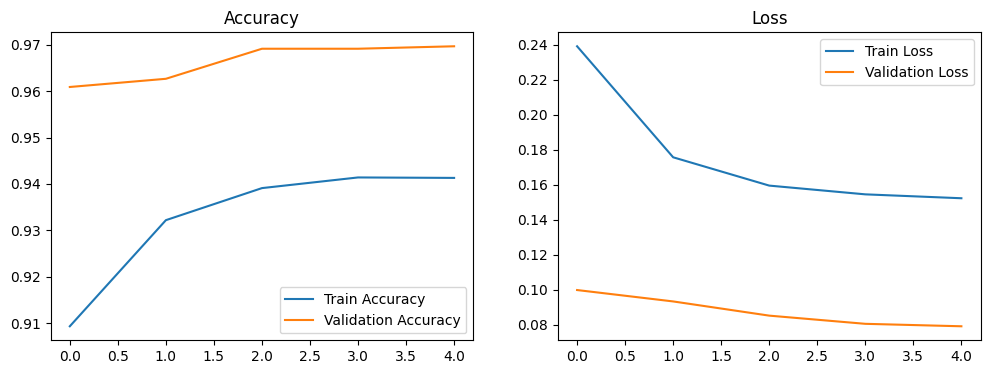

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


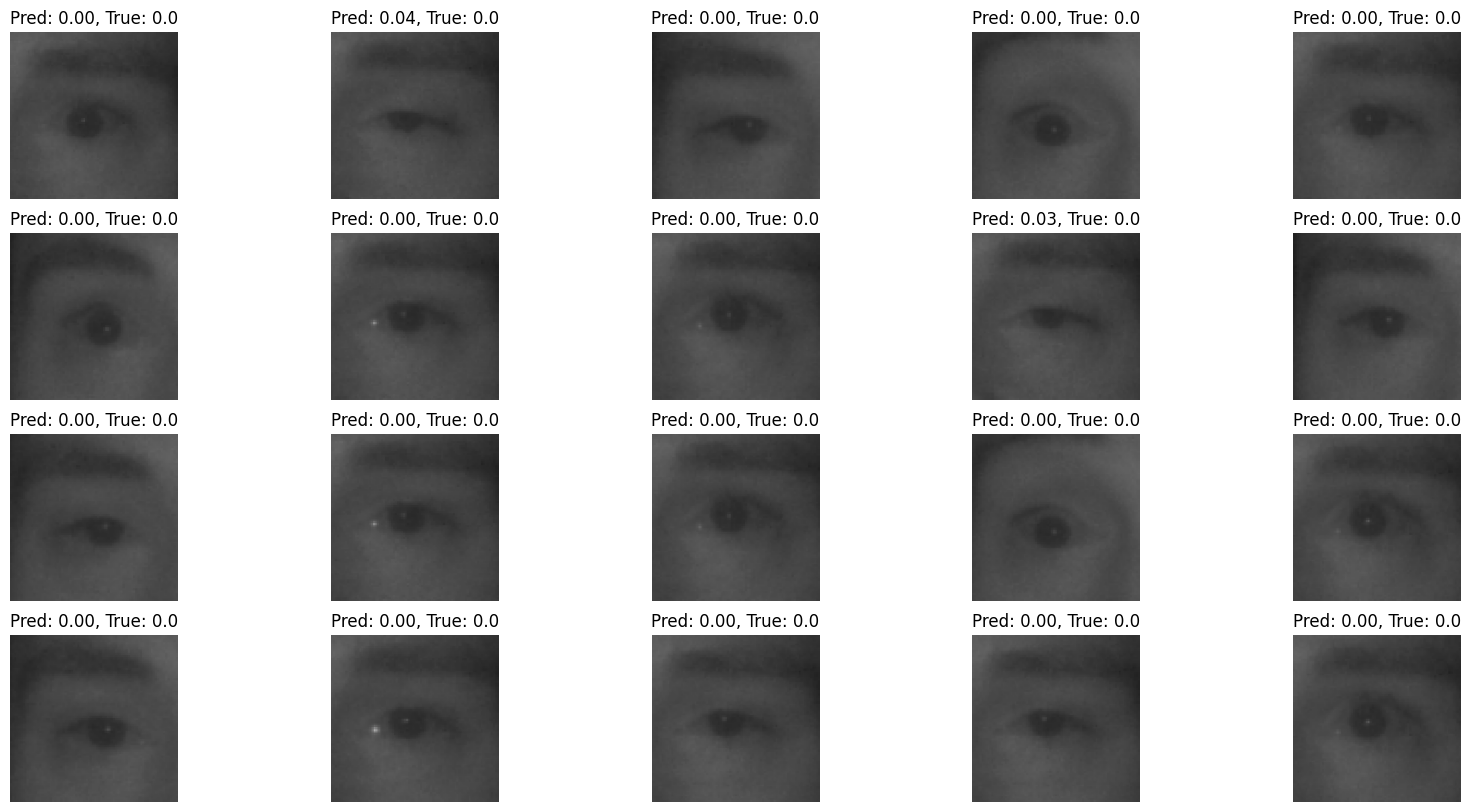

In [ ]:
# Visualize predictions
#import random

#def visualize_predictions(model, test_generator, num_images=20):
    test_images, test_labels = next(test_generator)
    predictions = model.predict(test_images)

    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        idx = random.randint(0, len(test_images) - 1)
        plt.subplot(4, 5, i + 1)
        plt.imshow(test_images[idx])
        plt.title(f'Pred: {predictions[idx][0]:.2f}, True: {test_labels[idx]}')
        plt.axis('off')
    plt.show()

#visualize_predictions(loaded_model, test_generator)

In [ ]:
#best preddiction code
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_indices):
    # Reverse class indices (e.g., {0:'awake', 1:'sleepy'})
    class_labels = {v: k for k, v in class_indices.items()}

    # Load and preprocess image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))
    image_array = np.expand_dims(image_resized, axis=0) / 255.0  # normalize between 0 and 1

    # Predict
    prediction = model.predict(image_array)[0]
    predicted_class_index = int(np.round(prediction)[0])
    predicted_class = class_labels[predicted_class_index]

    # Correct confidence calculation
    if predicted_class_index == 1:
        confidence = prediction[0] * 100  # for 'sleepy'
    else:
        confidence = (1 - prediction[0]) * 100  # for 'awake'

    # Display image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)", fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


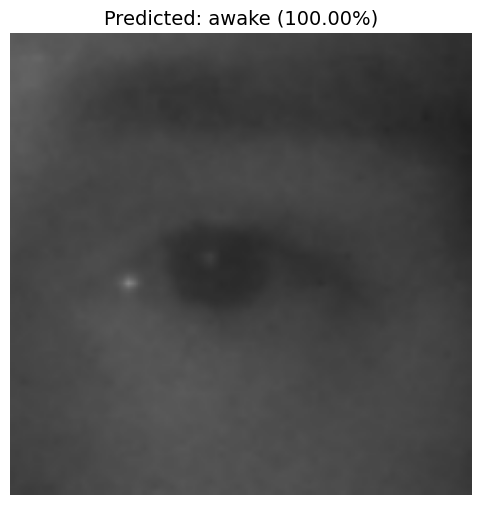

In [ ]:
predict_image("/content/data/test/awake/s0001_01876_0_0_1_0_0_01.png", loaded_model, train_generator.class_indices)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Get true labels
true_labels = test_generator.classes  # true class labels from the test set

# Step 2: Get model predictions
predictions = loaded_model.predict(test_generator)  # predict probabilities
predicted_labels = np.round(predictions).astype(int).flatten()  # convert probabilities to 0 or 1

# Step 3: Create reverse class_labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # e.g., {0:'awake', 1:'sleepy'}

# Step 4: Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))

# Step 5: Print the report
print(report)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


531/531 ━━━━━━━━━━━━━━━━━━━━ 53s 83ms/step
              precision    recall  f1-score   support

       awake       0.98      0.95      0.97      8591
      sleepy       0.95      0.98      0.97      8390

    accuracy                           0.97     16981
   macro avg       0.97      0.97      0.97     16981
weighted avg       0.97      0.97      0.97     16981



531/531 ━━━━━━━━━━━━━━━━━━━━ 37s 70ms/step


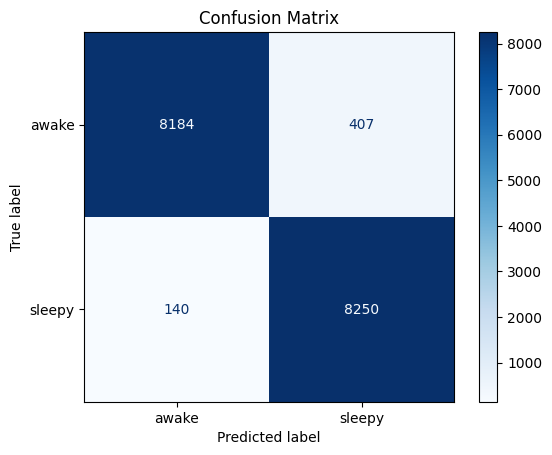

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: True and Predicted labels
true_labels = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_labels = np.round(predictions).astype(int).flatten()

# Step 2: Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 3: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 88s 166ms/step


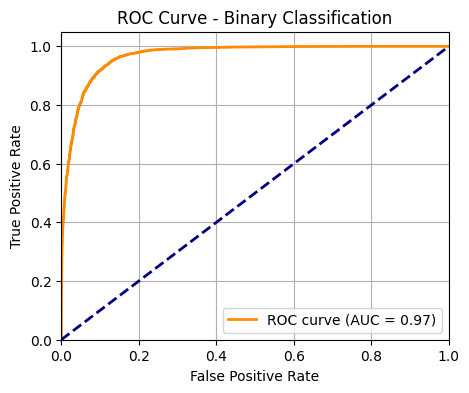

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels from the test set
y_true = test_generator.classes

# Predict probabilities from the model
y_pred_prob = loaded_model.predict(test_generator, verbose=1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Get true labels
y_true = test_generator.classes

# Get predicted probabilities (not rounded)
y_pred_prob = loaded_model.predict(test_generator, verbose=1)

# Calculate ROC AUC value
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Print the value
print(f"ROC AUC Score: {roc_auc:.4f}")


531/531 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step
ROC AUC Score: 0.9961


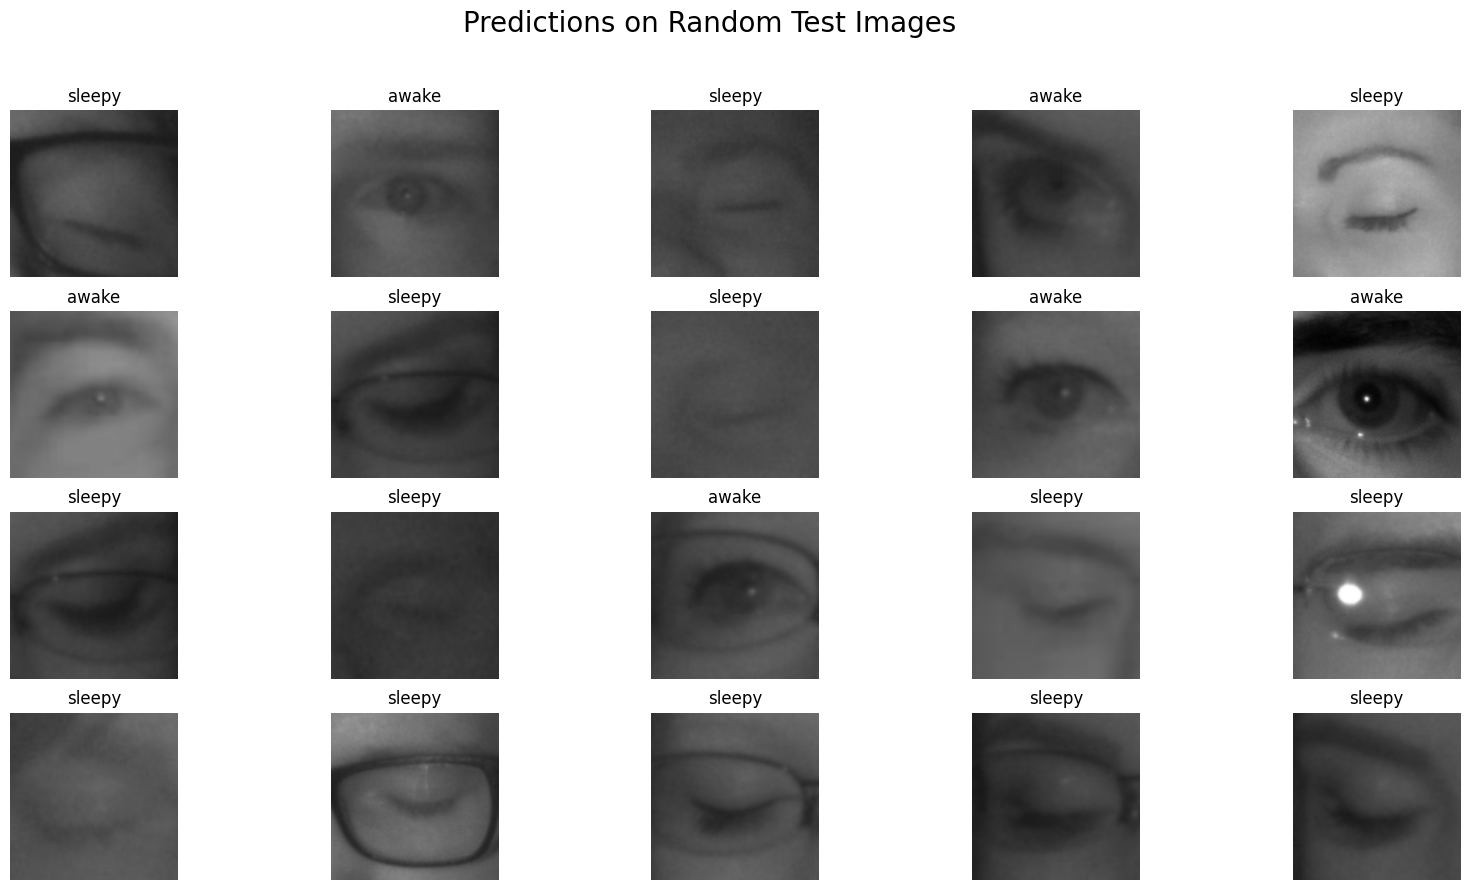

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get 20 random indices
num_images = 20
random_indices = np.random.choice(len(test_generator.filenames), num_images, replace=False)

# Step 2: Fetch the image file paths
image_paths = [test_generator.filepaths[i] for i in random_indices]

# Step 3: Predict each image
predicted_classes = []
true_classes = []
images = []

for img_path in image_paths:
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = loaded_model.predict(img_normalized, verbose=0)[0]
    predicted_class_idx = np.round(prediction).astype(int)[0]
    predicted_classes.append(predicted_class_idx)

    images.append(img_resized)

# Step 4: Map indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # reverse mapping

# Step 5: Plot results
plt.figure(figsize=(20, 10))
for idx in range(num_images):
    plt.subplot(4, 5, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    predicted_label = class_labels[predicted_classes[idx]]
    plt.title(predicted_label)

plt.suptitle("Predictions on Random Test Images", fontsize=20)
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [16]:
# Load Pretrained VGG16 Model (Without Top Layers)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# Freeze VGG16 Layers (So they don't get updated during training)
for layer in base_model.layers:
    layer.trainable = False

In [18]:
# Add Custom Classification Head
head_model = base_model.output
head_model = Flatten()(head_model)  # Flatten convolutional features
head_model = Dense(128, activation='relu')(head_model)  # Fully connected layer
head_model = Dropout(0.5)(head_model)  # Dropout for regularization
head_model = Dense(1, activation='sigmoid')(head_model)  # Output layer (2 classes)

In [19]:
# Create Final Model
model = Model(inputs=base_model.input, outputs=head_model)

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# Print Model Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_vgg16_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1)


In [ ]:
# Train Model
history= model.fit(train_generator,
          validation_data=val_generator,
          epochs=5,
          callbacks=[early_stopping, model_checkpoint, reduce_lr])
# Save history
import pickle
with open('Vgg16.pkl', 'wb') as f:
    pickle.dump(history.history, f)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_978']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 781s 483ms/step - accuracy: 0.6396 - loss: 0.6318 - val_accuracy: 0.8802 - val_loss: 0.3456 - learning_rate: 0.0010
Epoch 2/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 870s 533ms/step - accuracy: 0.7656 - loss: 0.4764 - val_accuracy: 0.8976 - val_loss: 0.3176 - learning_rate: 0.0010
Epoch 3/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 758s 476ms/step - accuracy: 0.8032 - loss: 0.4289 - val_accuracy: 0.9072 - val_loss: 0.2798 - learning_rate: 0.0010
Epoch 4/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 751s 472ms/step - accuracy: 0.8136 - loss: 0.4138 - val_accuracy: 0.9006 - val_loss: 0.3207 - learning_rate: 0.0010
Epoch 5/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 786s 494ms/step - accuracy: 0.8256 - loss: 0.4107 - val_accuracy: 0.9136 - val_loss: 0.2867 - learning_rate: 0.0010


In [ ]:
model.save("/content/drive/MyDrive/VGG16.h5")  # Save in Google Drive

In [22]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/VGG16.h5")
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,211 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [13]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


531/531 ━━━━━━━━━━━━━━━━━━━━ 100s 167ms/step - accuracy: 0.1507 - loss: 0.9483
Test Accuracy: 49.41%


In [23]:
# Unfreeze last 4 convolutional layers
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Re-compile with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Continue training (fine-tuning phase)
fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,  #
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_44']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 915s 562ms/step - accuracy: 0.8485 - loss: 0.3000 - val_accuracy: 0.9731 - val_loss: 0.0745 - learning_rate: 1.0000e-05
Epoch 2/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 812s 510ms/step - accuracy: 0.9730 - loss: 0.0799 - val_accuracy: 0.9855 - val_loss: 0.0440 - learning_rate: 1.0000e-05
Epoch 3/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 808s 508ms/step - accuracy: 0.9788 - loss: 0.0617 - val_accuracy: 0.9835 - val_loss: 0.0424 - learning_rate: 1.0000e-05
Epoch 4/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 805s 506ms/step - accuracy: 0.9809 - loss: 0.0570 - val_accuracy: 0.9879 - val_loss: 0.0360 - learning_rate: 1.0000e-05
Epoch 5/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 871s 547ms/step - accuracy: 0.9830 - loss: 0.0483 - val_accuracy: 0.9853 - val_loss: 0.0415 - learning_rate: 1.0000e-05


In [25]:
model.save("/content/drive/MyDrive/Re_VGG16.h5")  # Save in Google Drive

In [26]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/Re_VGG16.h5")
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,211 (68.38 MB)

 Trainable params: 16,780,801 (64.01 MB)

 Non-trainable params: 1,145,408 (4.37 MB)

 Optimizer params: 2 (12.00 B)

In [27]:
# Re_Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

531/531 ━━━━━━━━━━━━━━━━━━━━ 88s 162ms/step - accuracy: 0.9841 - loss: 0.0446
Test Accuracy: 98.76%


In [ ]:
import pickle
# Load history
with open('Vgg16.pkl', 'rb') as f:
    history_data = pickle.load(f)

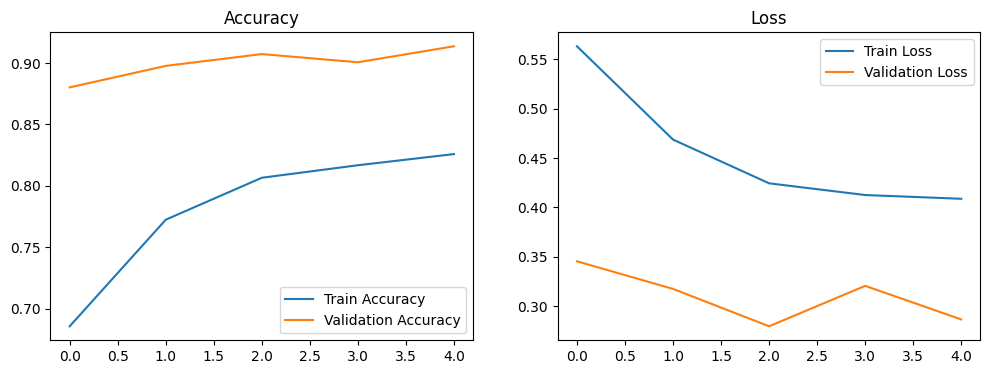

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step


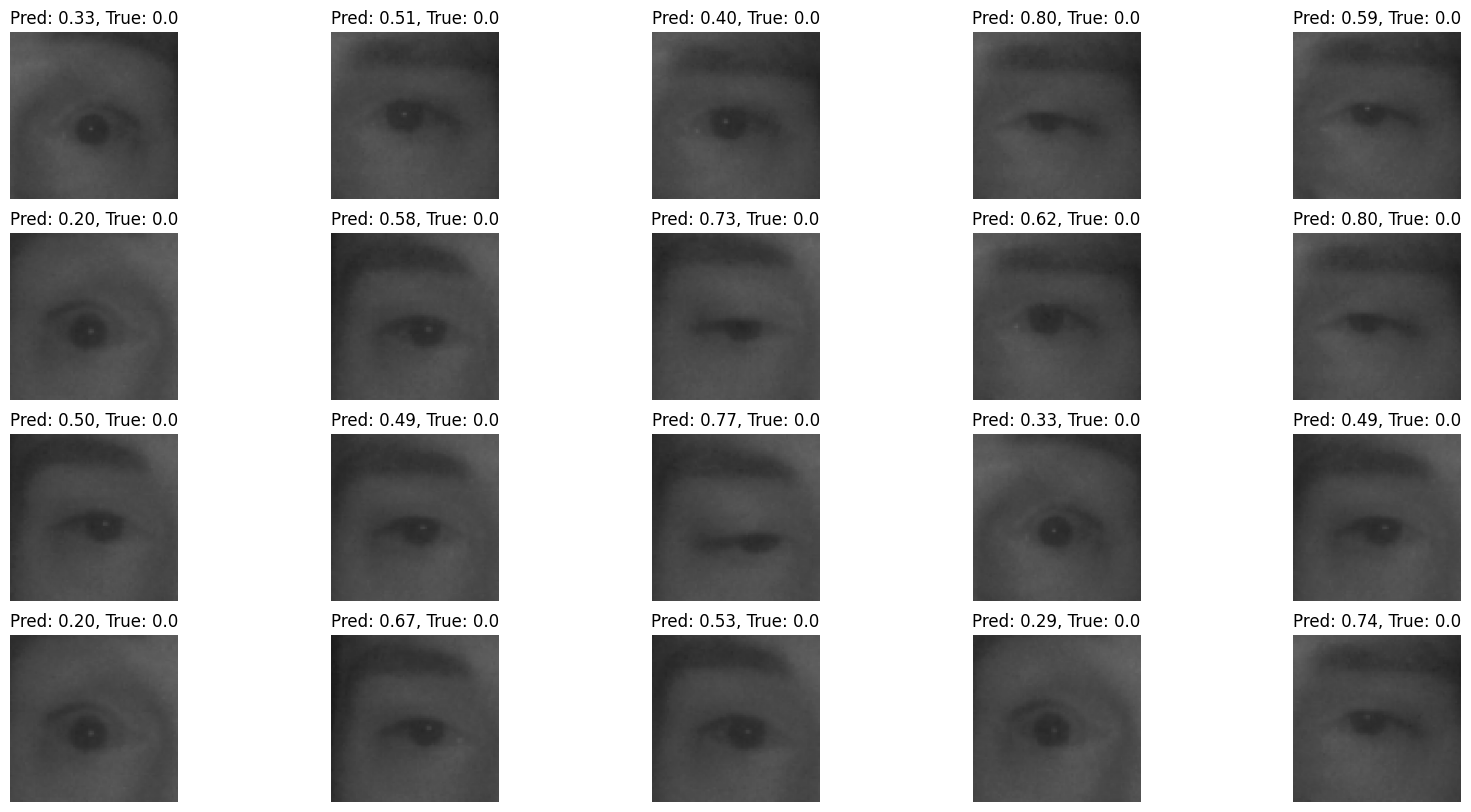

In [ ]:
# Visualize predictions
import random

def visualize_predictions(model, test_generator, num_images=20):
    test_images, test_labels = next(test_generator)
    predictions = model.predict(test_images)

    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        idx = random.randint(0, len(test_images) - 1)
        plt.subplot(4, 5, i + 1)
        plt.imshow(test_images[idx])
        plt.title(f'Pred: {predictions[idx][0]:.2f}, True: {test_labels[idx]}')
        plt.axis('off')
    plt.show()

visualize_predictions(loaded_model, test_generator)

In [ ]:
#best preddiction code
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_indices):
    # Reverse class indices (e.g., {0:'awake', 1:'sleepy'})
    class_labels = {v: k for k, v in class_indices.items()}

    # Load and preprocess image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))
    image_array = np.expand_dims(image_resized, axis=0) / 255.0  # normalize between 0 and 1

    # Predict
    prediction = model.predict(image_array)[0]
    predicted_class_index = int(np.round(prediction)[0])
    predicted_class = class_labels[predicted_class_index]

    # Correct confidence calculation
    if predicted_class_index == 1:
        confidence = prediction[0] * 100  # for 'sleepy'
    else:
        confidence = (1 - prediction[0]) * 100  # for 'awake'

    # Display image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)", fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


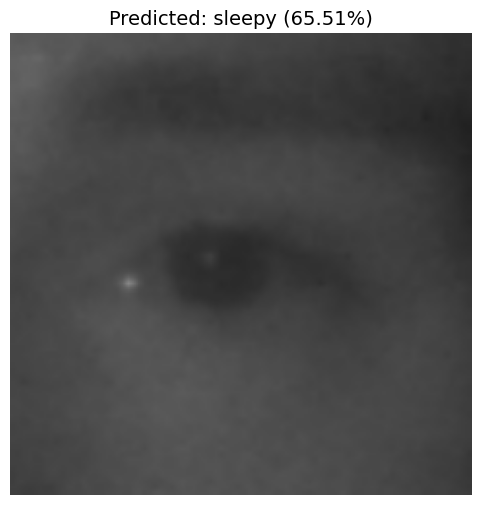

In [ ]:
predict_image("/content/data/test/awake/s0001_01876_0_0_1_0_0_01.png", loaded_model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


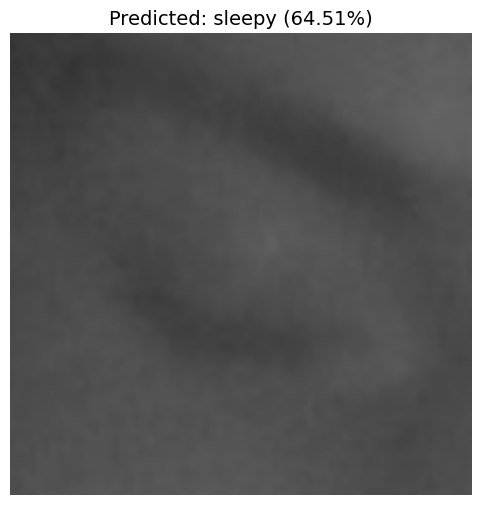

In [ ]:
predict_image("/content/data/test/sleepy/s0005_00373_0_0_0_0_0_01.png", loaded_model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


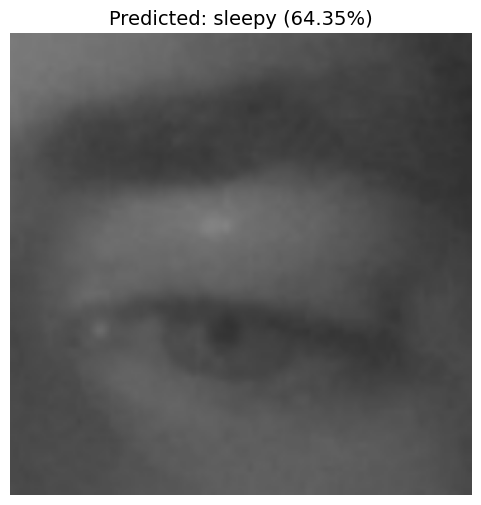

In [ ]:
predict_image("/content/data/test/awake/s0012_04540_0_0_1_0_0_01.png", loaded_model, train_generator.class_indices)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Get true labels
true_labels = test_generator.classes  # true class labels from the test set

# Step 2: Get model predictions
predictions = loaded_model.predict(test_generator)  # predict probabilities
predicted_labels = np.round(predictions).astype(int).flatten()  # convert probabilities to 0 or 1

# Step 3: Create reverse class_labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # e.g., {0:'awake', 1:'sleepy'}

# Step 4: Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))

# Step 5: Print the report
print(report)


531/531 ━━━━━━━━━━━━━━━━━━━━ 112s 185ms/step
              precision    recall  f1-score   support

       awake       0.00      0.00      0.00      8591
      sleepy       0.49      1.00      0.66      8390

    accuracy                           0.49     16981
   macro avg       0.25      0.50      0.33     16981
weighted avg       0.24      0.49      0.33     16981



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Get true labels
true_labels = test_generator.classes  # true class labels from the test set

# Step 2: Get model predictions
predictions = loaded_model.predict(test_generator)  # predict probabilities
predicted_labels = np.round(predictions).astype(int).flatten()  # convert probabilities to 0 or 1

# Step 3: Create reverse class_labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # e.g., {0:'awake', 1:'sleepy'}

# Step 4: Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))

# Step 5: Print the report
print(report)

531/531 ━━━━━━━━━━━━━━━━━━━━ 87s 162ms/step
              precision    recall  f1-score   support

       awake       0.99      0.99      0.99      8591
      sleepy       0.99      0.99      0.99      8390

    accuracy                           0.99     16981
   macro avg       0.99      0.99      0.99     16981
weighted avg       0.99      0.99      0.99     16981



531/531 ━━━━━━━━━━━━━━━━━━━━ 89s 167ms/step


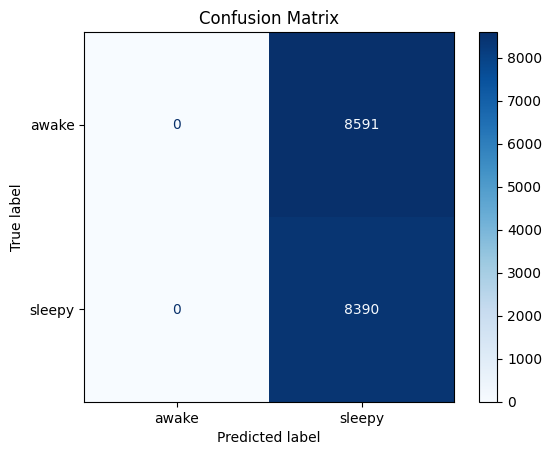

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: True and Predicted labels
true_labels = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_labels = np.round(predictions).astype(int).flatten()

# Step 2: Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 3: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 85s 161ms/step


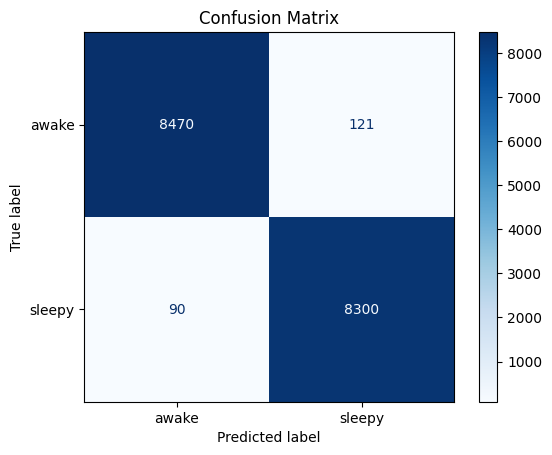

In [29]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: True and Predicted labels
true_labels = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_labels = np.round(predictions).astype(int).flatten()

# Step 2: Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 3: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


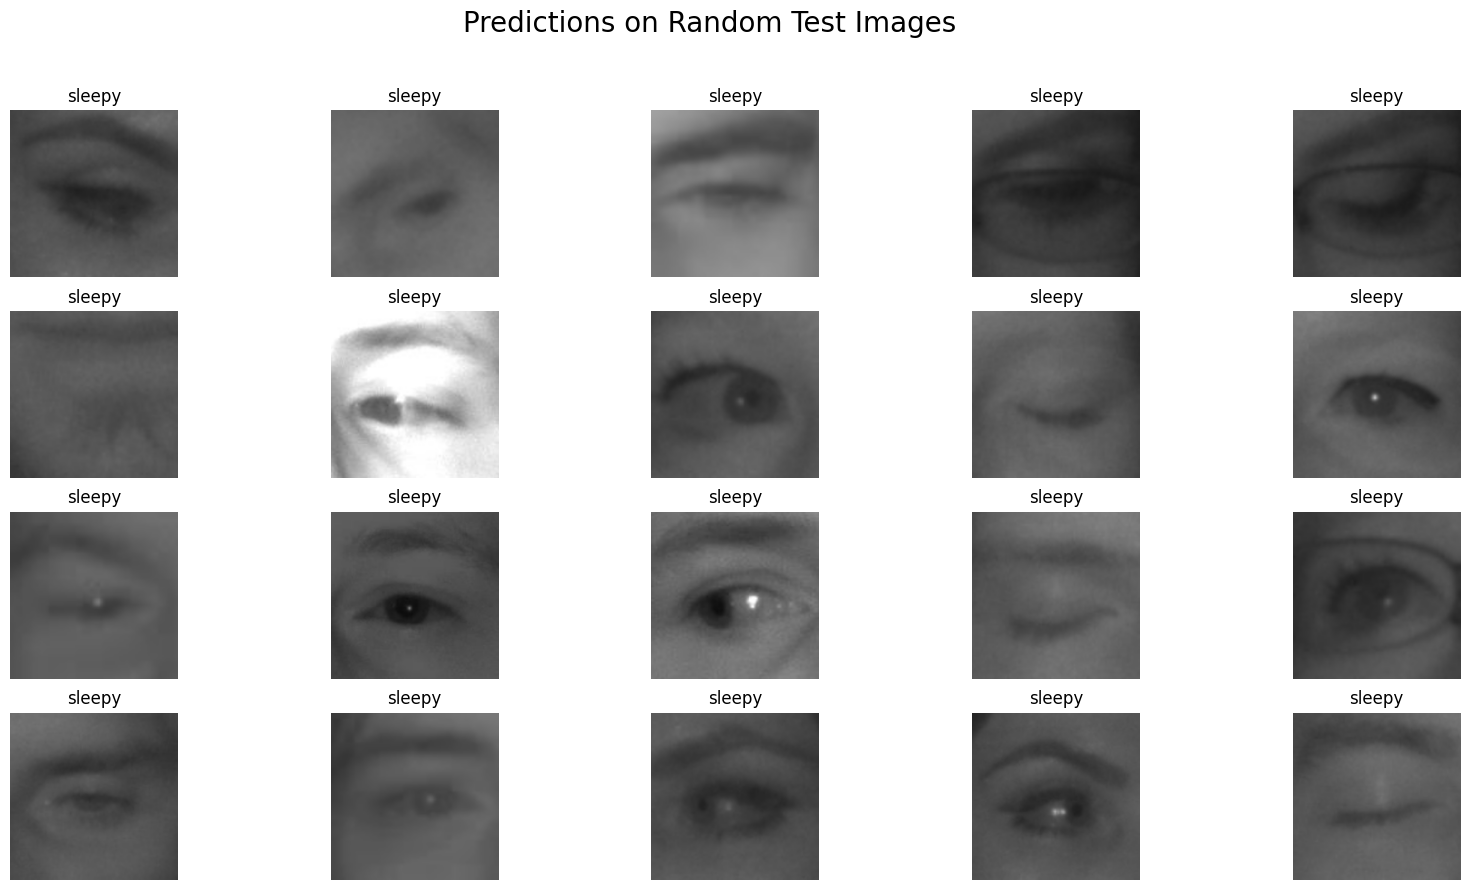

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get 20 random indices
num_images = 20
random_indices = np.random.choice(len(test_generator.filenames), num_images, replace=False)

# Step 2: Fetch the image file paths
image_paths = [test_generator.filepaths[i] for i in random_indices]

# Step 3: Predict each image
predicted_classes = []
true_classes = []
images = []

for img_path in image_paths:
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = loaded_model.predict(img_normalized, verbose=0)[0]
    predicted_class_idx = np.round(prediction).astype(int)[0]
    predicted_classes.append(predicted_class_idx)

    images.append(img_resized)

# Step 4: Map indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # reverse mapping

# Step 5: Plot results
plt.figure(figsize=(20, 10))
for idx in range(num_images):
    plt.subplot(4, 5, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    predicted_label = class_labels[predicted_classes[idx]]
    plt.title(predicted_label)

plt.suptitle("Predictions on Random Test Images", fontsize=20)
plt.show()




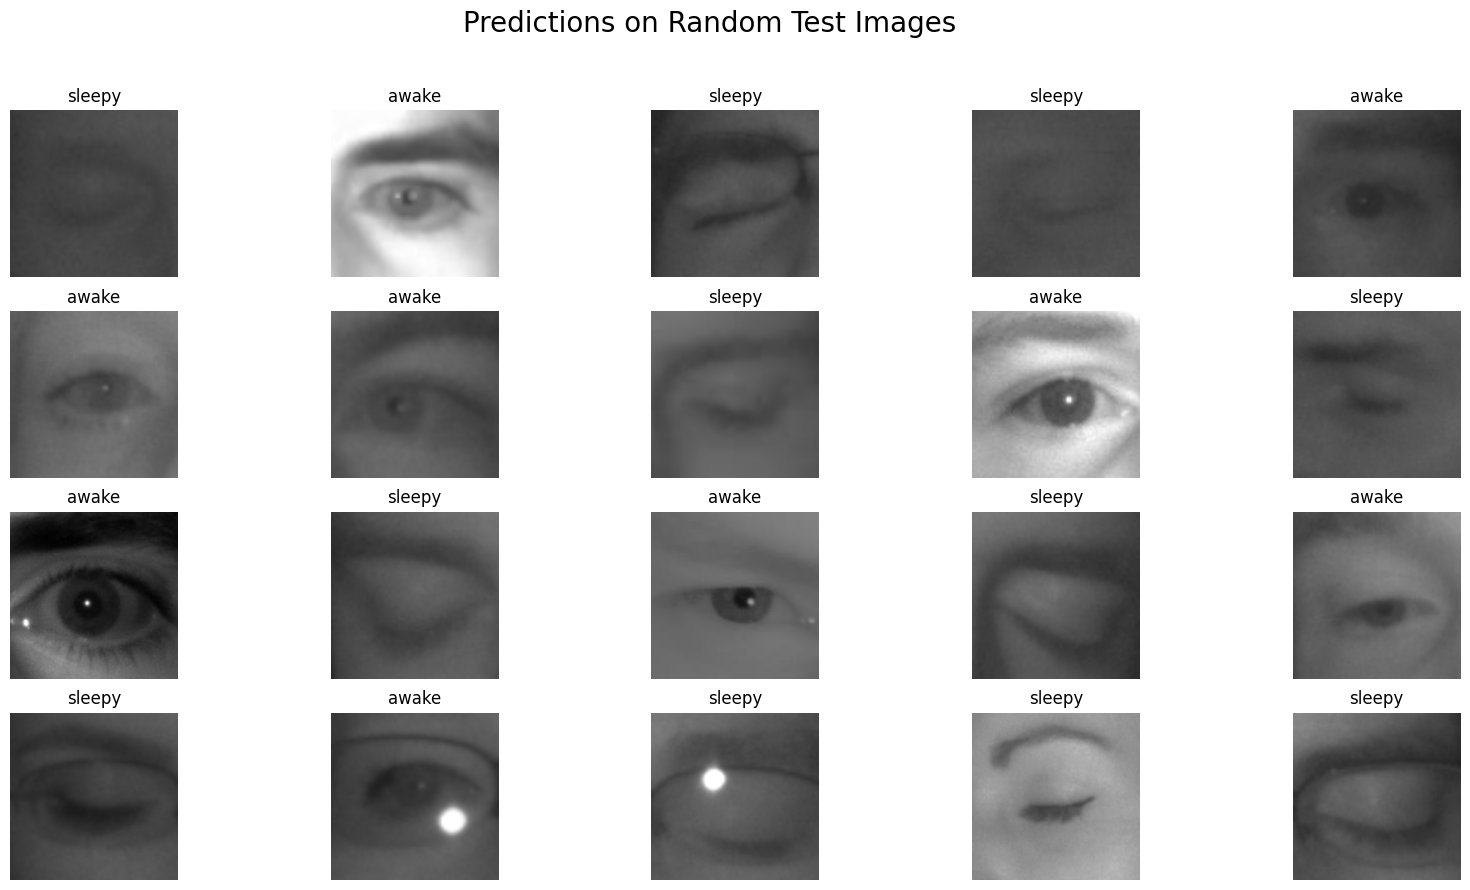

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get 20 random indices
num_images = 20
random_indices = np.random.choice(len(test_generator.filenames), num_images, replace=False)

# Step 2: Fetch the image file paths
image_paths = [test_generator.filepaths[i] for i in random_indices]

# Step 3: Predict each image
predicted_classes = []
true_classes = []
images = []

for img_path in image_paths:
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = loaded_model.predict(img_normalized, verbose=0)[0]
    predicted_class_idx = np.round(prediction).astype(int)[0]
    predicted_classes.append(predicted_class_idx)

    images.append(img_resized)

# Step 4: Map indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # reverse mapping

# Step 5: Plot results
plt.figure(figsize=(20, 10))
for idx in range(num_images):
    plt.subplot(4, 5, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    predicted_label = class_labels[predicted_classes[idx]]
    plt.title(predicted_label)

plt.suptitle("Predictions on Random Test Images", fontsize=20)
plt.show()




/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


531/531 ━━━━━━━━━━━━━━━━━━━━ 103s 173ms/step


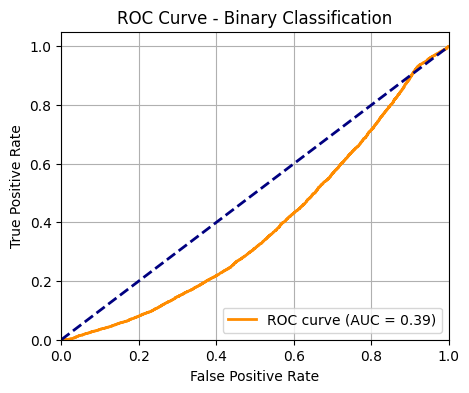

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels from the test set
y_true = test_generator.classes

# Predict probabilities from the model
y_pred_prob = loaded_model.predict(test_generator, verbose=1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 86s 162ms/step


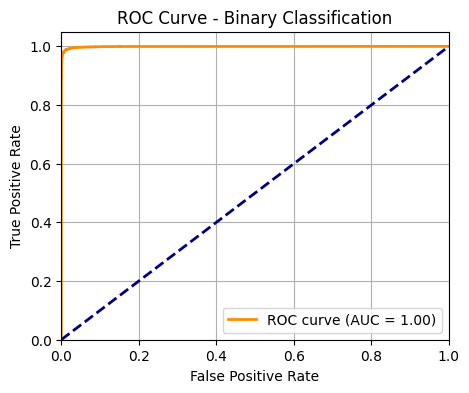

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels from the test set
y_true = test_generator.classes

# Predict probabilities from the model
y_pred_prob = loaded_model.predict(test_generator, verbose=1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [ ]:
# Load Pretrained ResNet50 Model (Without Top Layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Freeze ResNet50 Layers (So they don't get updated during training)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add Custom Classification Head
head_model = base_model.output
head_model = Flatten()(head_model)  # Flatten convolutional features
head_model = Dense(128, activation='relu')(head_model)  # Fully connected layer
head_model = Dropout(0.5)(head_model)  # Dropout for regularization
head_model = Dense(1, activation='sigmoid')(head_model)  # Output layer (2 classes)

In [ ]:
# Create Final Model
model = Model(inputs=base_model.input, outputs=head_model)


In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Print Model Summary
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 36,433,025 (138.98 MB)

 Trainable params: 12,845,313 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Define Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_resnet_model.keras', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1)

In [ ]:
# Train Model
history = model.fit(train_generator,
          validation_data=val_generator,
          epochs=5,
          callbacks=[early_stopping, model_checkpoint, reduce_lr])
# Save history
import pickle
with open('Resnet50.pkl', 'wb') as f:
    pickle.dump(history.history, f)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1458']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 814s 503ms/step - accuracy: 0.4994 - loss: 0.8245 - val_accuracy: 0.5059 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 2/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 816s 513ms/step - accuracy: 0.5038 - loss: 0.6932 - val_accuracy: 0.5059 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 3/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 768s 483ms/step - accuracy: 0.5069 - loss: 0.6931 - val_accuracy: 0.5059 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 4/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.5044 - loss: 0.6931
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 808s 508ms/step - accuracy: 0.5044 - loss: 0.6931 - val_accuracy: 0.5059 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 5/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 773s 485ms/step - accuracy: 0.5065 - loss: 0.6931 - val_accuracy: 0.5059 - val_loss: 0.6931 - learning_rate: 1.0000e-04


In [ ]:
model.save("/content/drive/MyDrive/Resnet50.h5")  # Save in Google Drive

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/Resnet50.h5")
loaded_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 36,433,027 (138.98 MB)

 Trainable params: 12,845,313 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

531/531 ━━━━━━━━━━━━━━━━━━━━ 53s 90ms/step - accuracy: 0.8493 - loss: 0.6822
Test Accuracy: 50.59%


In [ ]:
import pickle
# Load history
with open('Inceptionv3.pkl', 'rb') as f:
    history_data = pickle.load(f)

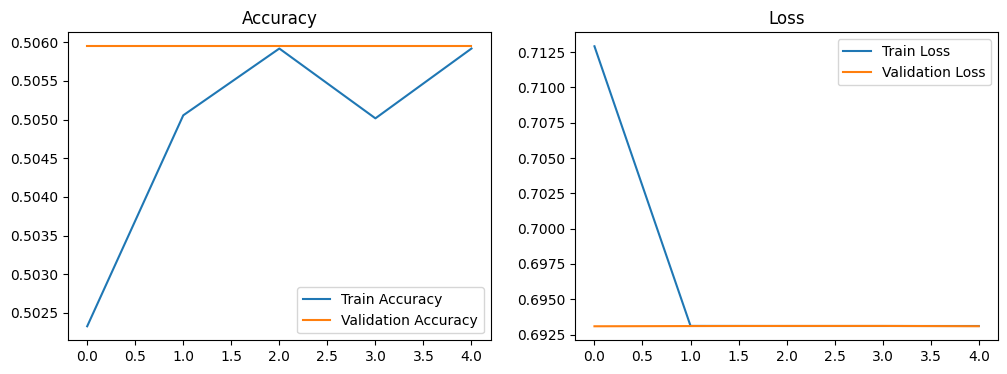

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
print("Class indices:", train_generator.class_indices)#.....as per folder names kera automatically assign numbers


Class indices: {'awake': 0, 'sleepy': 1}


In [ ]:
#best preddiction code
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_indices):
    # Reverse class indices (e.g., {0:'awake', 1:'sleepy'})
    class_labels = {v: k for k, v in class_indices.items()}

    # Load and preprocess image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))
    image_array = np.expand_dims(image_resized, axis=0) / 255.0  # normalize between 0 and 1

    # Predict
    prediction = model.predict(image_array)[0]
    predicted_class_index = int(np.round(prediction)[0])
    predicted_class = class_labels[predicted_class_index]

    # Correct confidence calculation
    if predicted_class_index == 1:
        confidence = prediction[0] * 100  # for 'sleepy'
    else:
        confidence = (1 - prediction[0]) * 100  # for 'awake'

    # Display image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)", fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


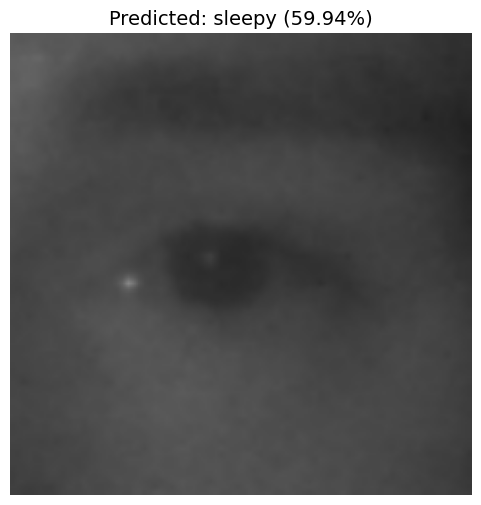

In [ ]:
predict_image("/content/data/test/awake/s0001_01876_0_0_1_0_0_01.png", loaded_model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


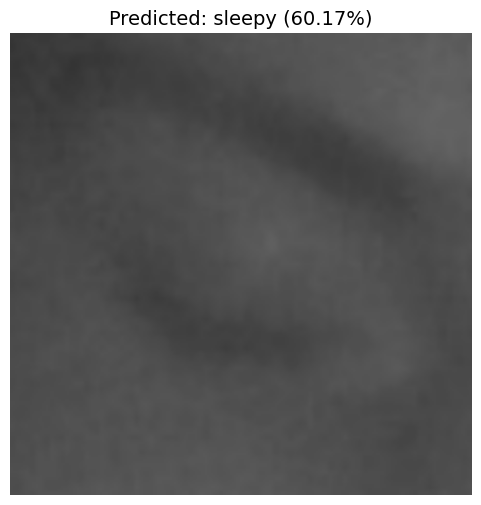

In [ ]:
predict_image("/content/data/test/sleepy/s0005_00373_0_0_0_0_0_01.png", loaded_model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


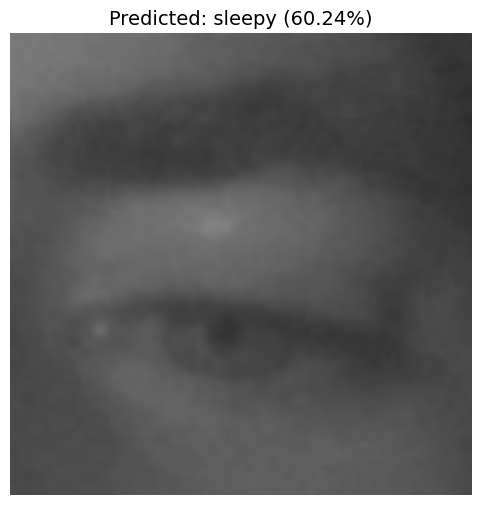

In [ ]:
predict_image("/content/data/test/awake/s0012_04540_0_0_1_0_0_01.png", loaded_model, train_generator.class_indices)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Get true labels
true_labels = test_generator.classes  # true class labels from the test set

# Step 2: Get model predictions
predictions = loaded_model.predict(test_generator)  # predict probabilities
predicted_labels = np.round(predictions).astype(int).flatten()  # convert probabilities to 0 or 1

# Step 3: Create reverse class_labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # e.g., {0:'awake', 1:'sleepy'}

# Step 4: Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))

# Step 5: Print the report
print(report)





531/531 ━━━━━━━━━━━━━━━━━━━━ 57s 96ms/step
              precision    recall  f1-score   support

       awake       0.00      0.00      0.00      8591
      sleepy       0.49      1.00      0.66      8390

    accuracy                           0.49     16981
   macro avg       0.25      0.50      0.33     16981
weighted avg       0.24      0.49      0.33     16981



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


531/531 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step


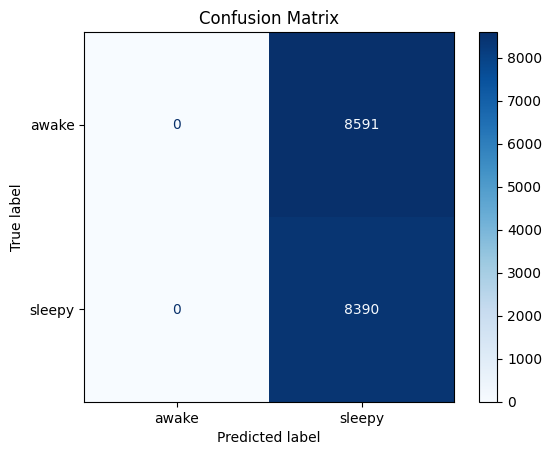

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: True and Predicted labels
true_labels = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_labels = np.round(predictions).astype(int).flatten()

# Step 2: Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 3: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()






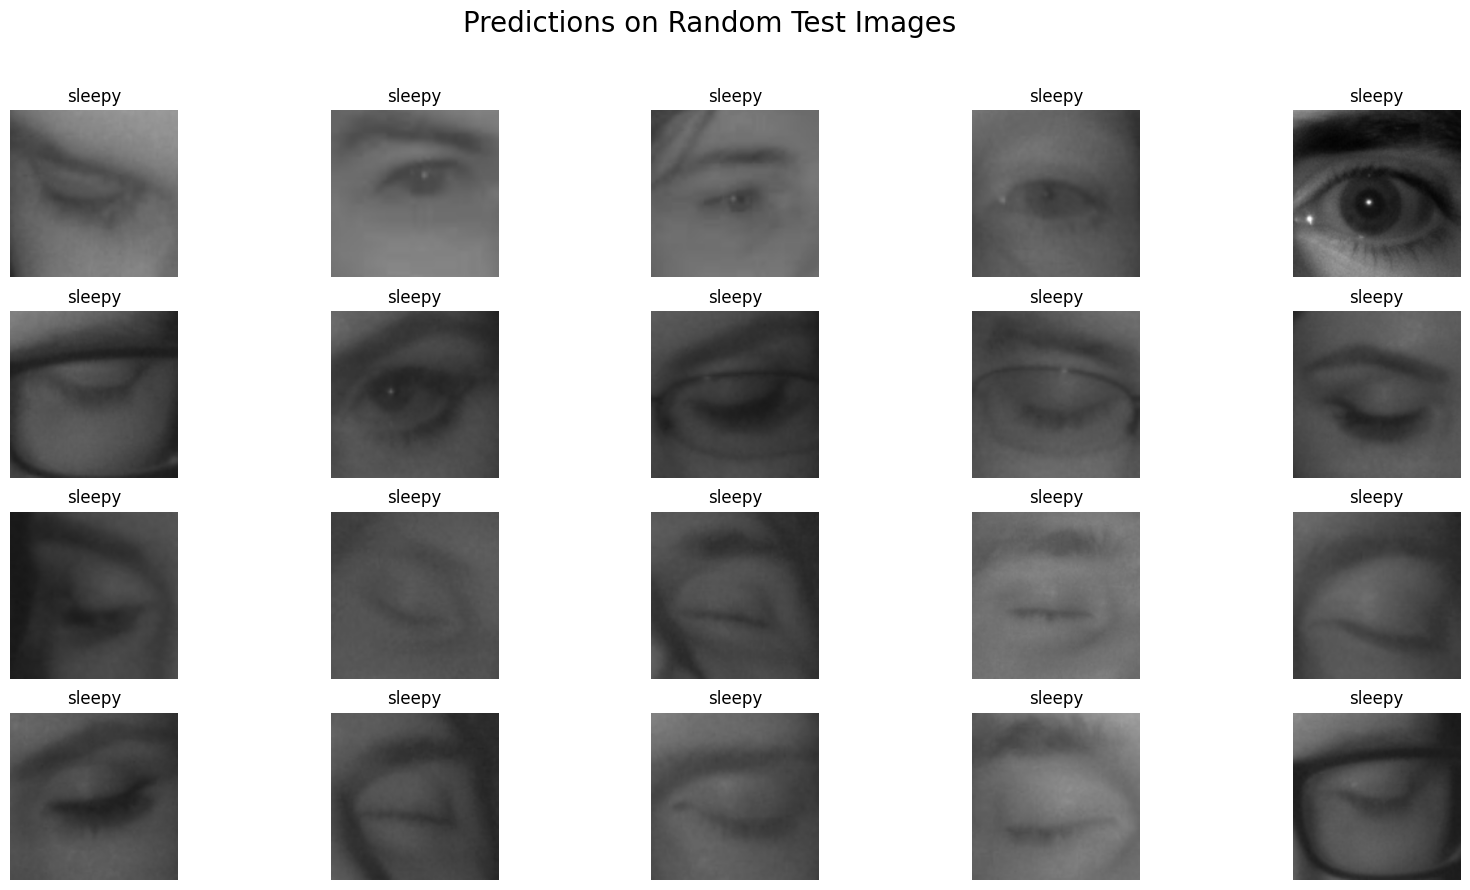

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get 20 random indices
num_images = 20
random_indices = np.random.choice(len(test_generator.filenames), num_images, replace=False)

# Step 2: Fetch the image file paths
image_paths = [test_generator.filepaths[i] for i in random_indices]

# Step 3: Predict each image
predicted_classes = []
true_classes = []
images = []

for img_path in image_paths:
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = loaded_model.predict(img_normalized, verbose=0)[0]
    predicted_class_idx = np.round(prediction).astype(int)[0]
    predicted_classes.append(predicted_class_idx)

    images.append(img_resized)

# Step 4: Map indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # reverse mapping

# Step 5: Plot results
plt.figure(figsize=(20, 10))
for idx in range(num_images):
    plt.subplot(4, 5, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    predicted_label = class_labels[predicted_classes[idx]]
    plt.title(predicted_label)

plt.suptitle("Predictions on Random Test Images", fontsize=20)
plt.show()




531/531 ━━━━━━━━━━━━━━━━━━━━ 45s 85ms/step


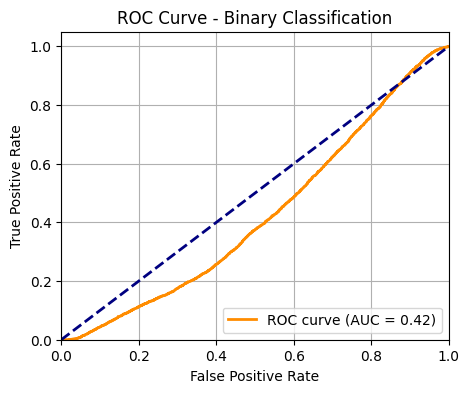

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels from the test set
y_true = test_generator.classes

# Predict probabilities from the model
y_pred_prob = loaded_model.predict(test_generator, verbose=1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer


In [ ]:
# Load Pretrained MobileNetV2 Model (Without Top Layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


<ipython-input-27-3b523facb4d9>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Freeze Base Model Layers (Transfer Learning)
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Add Custom Classification Head
head_model = base_model.output
head_model = Flatten()(head_model)
head_model = Dense(128, activation='relu')(head_model)
head_model = Dropout(0.5)(head_model)
head_model = Dense(1, activation='sigmoid')(head_model)


In [ ]:
# Create Final Model
model = Model(inputs=base_model.input, outputs=head_model)


In [ ]:
# Unfreeze the last few layers for fine-tuning
#for layer in base_model.layers[-50:]:  # unfreeze last 50 layers
    #layer.trainable = True

# Use a smaller learning rate for fine-tuning
#optimizer = Adam(learning_rate=1e-5)

# Compile Model
#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Print Model Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 10,286,401 (39.24 MB)

 Trainable params: 8,028,417 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Define Callbacks

# Early Stopping: Stop training if validation loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Model Checkpoint: Save the best model based on validation loss
model_checkpoint = ModelCheckpoint('best_mobilenetv2_model.keras', save_best_only=True, verbose=1)

# Reduce Learning Rate: Reduce LR if validation loss plateaus for 3 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)


In [ ]:
# Train Model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])


NameError: name 'train_generator' is not defined

In [ ]:
# Save history
import pickle
with open('Mobilenetv2.pkl', 'wb') as f:
    pickle.dump(history.history, f)

531/531 ━━━━━━━━━━━━━━━━━━━━ 25s 48ms/step - accuracy: 0.9532 - loss: 0.1060
Test Accuracy: 95.78%


In [ ]:
model.save("/content/drive/MyDrive/Mobilenetv2.h5")  # Save in Google Drive

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/Mobilenetv2.h5")
loaded_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 10,286,403 (39.24 MB)

 Trainable params: 8,028,417 (30.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

531/531 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9494 - loss: 0.1100
Test Accuracy: 95.43%


In [ ]:
import pickle
# Load history
with open('Mobilenetv2.pkl', 'rb') as f:
    history_data = pickle.load(f)

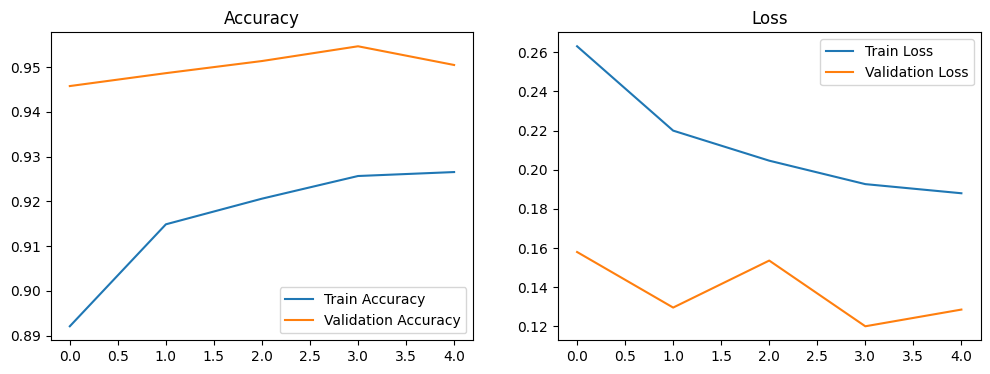

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
#prediction
print("Class indices:", train_generator.class_indices)#.....as per folder names kera automatically assign numbers


Class indices: {'awake': 0, 'sleepy': 1}


In [ ]:
import cv2

In [ ]:
test_image =cv2.imread("/content/data/test/awake/s0001_01876_0_0_1_0_0_01.png")

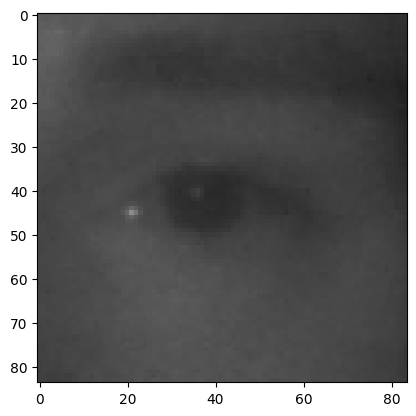

In [ ]:
plt.imshow(test_image)

In [ ]:
#best preddiction code
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_indices):
    # Reverse class indices (e.g., {0:'awake', 1:'sleepy'})
    class_labels = {v: k for k, v in class_indices.items()}

    # Load and preprocess image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))
    image_array = np.expand_dims(image_resized, axis=0) / 255.0  # normalize between 0 and 1

    # Predict
    prediction = model.predict(image_array)[0]
    predicted_class_index = int(np.round(prediction)[0])
    predicted_class = class_labels[predicted_class_index]

    # Correct confidence calculation
    if predicted_class_index == 1:
        confidence = prediction[0] * 100  # for 'sleepy'
    else:
        confidence = (1 - prediction[0]) * 100  # for 'awake'

    # Display image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)", fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


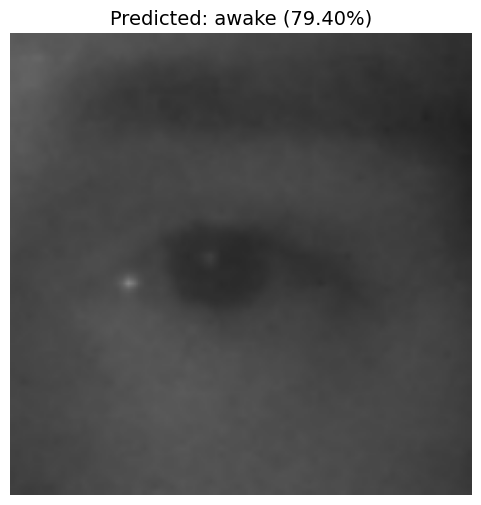

In [ ]:
predict_image("/content/data/test/awake/s0001_01876_0_0_1_0_0_01.png", loaded_model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


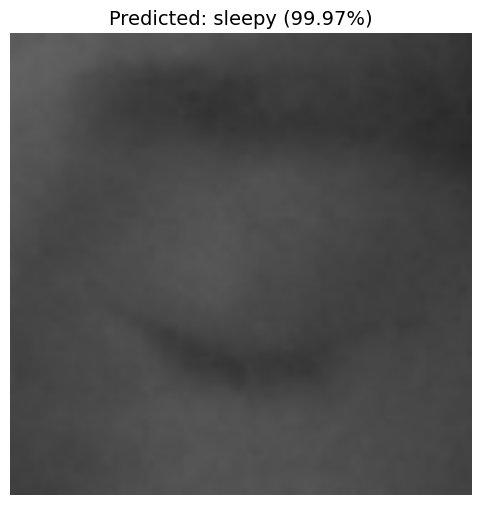

In [ ]:
predict_image("/content/data/test/sleepy/s0001_00012_0_0_0_0_0_01.png", loaded_model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


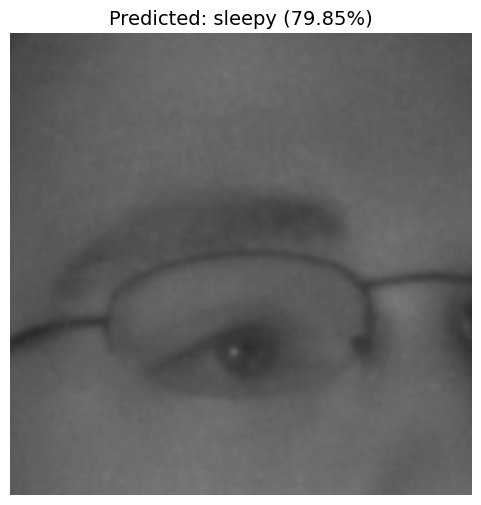

In [ ]:
predict_image("/content/data/test/awake/s0001_02881_0_1_1_0_1_01.png", loaded_model, train_generator.class_indices)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Get true labels
true_labels = test_generator.classes  # true class labels from the test set

# Step 2: Get model predictions
predictions = loaded_model.predict(test_generator)  # predict probabilities
predicted_labels = np.round(predictions).astype(int).flatten()  # convert probabilities to 0 or 1

# Step 3: Create reverse class_labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # e.g., {0:'awake', 1:'sleepy'}

# Step 4: Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))

# Step 5: Print the report
print(report)


531/531 ━━━━━━━━━━━━━━━━━━━━ 36s 56ms/step
              precision    recall  f1-score   support

       awake       0.95      0.96      0.96      8591
      sleepy       0.96      0.95      0.95      8390

    accuracy                           0.95     16981
   macro avg       0.95      0.95      0.95     16981
weighted avg       0.95      0.95      0.95     16981



531/531 ━━━━━━━━━━━━━━━━━━━━ 28s 53ms/step


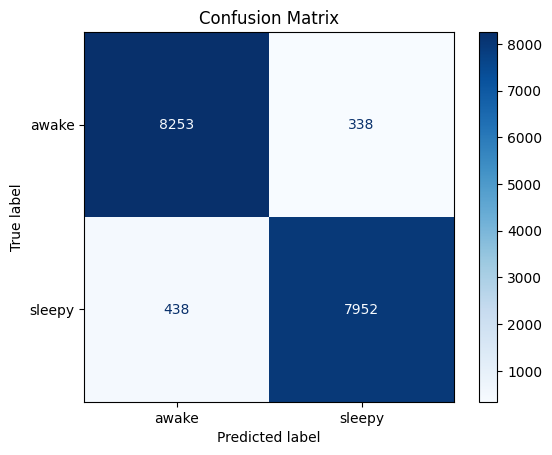

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: True and Predicted labels
true_labels = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_labels = np.round(predictions).astype(int).flatten()

# Step 2: Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 3: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


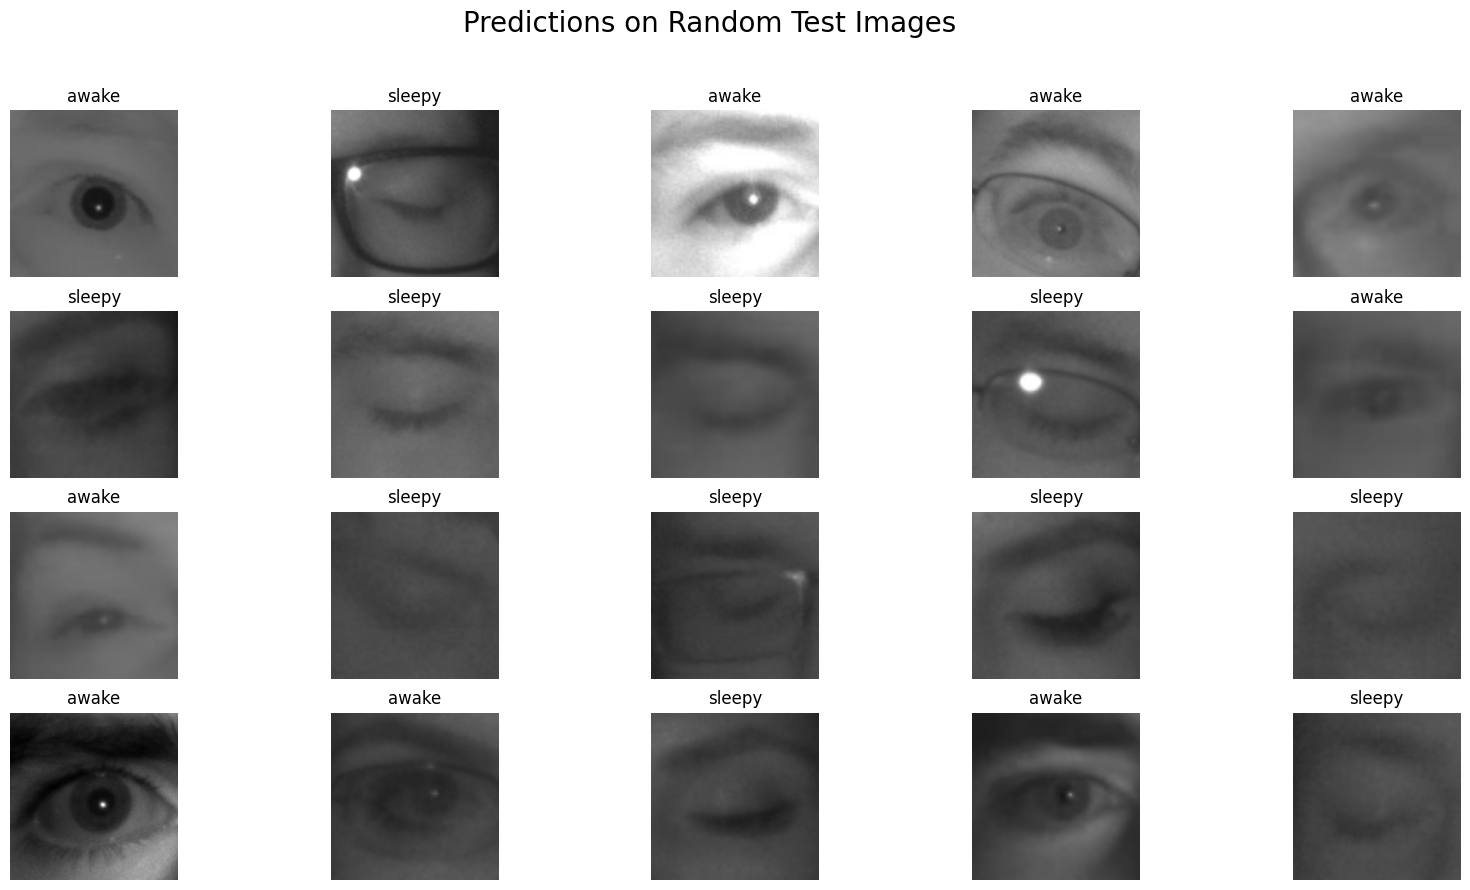

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get 20 random indices
num_images = 20
random_indices = np.random.choice(len(test_generator.filenames), num_images, replace=False)

# Step 2: Fetch the image file paths
image_paths = [test_generator.filepaths[i] for i in random_indices]

# Step 3: Predict each image
predicted_classes = []
true_classes = []
images = []

for img_path in image_paths:
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = loaded_model.predict(img_normalized, verbose=0)[0]
    predicted_class_idx = np.round(prediction).astype(int)[0]
    predicted_classes.append(predicted_class_idx)

    images.append(img_resized)

# Step 4: Map indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # reverse mapping

# Step 5: Plot results
plt.figure(figsize=(20, 10))
for idx in range(num_images):
    plt.subplot(4, 5, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    predicted_label = class_labels[predicted_classes[idx]]
    plt.title(predicted_label)

plt.suptitle("Predictions on Random Test Images", fontsize=20)
plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 29s 50ms/step


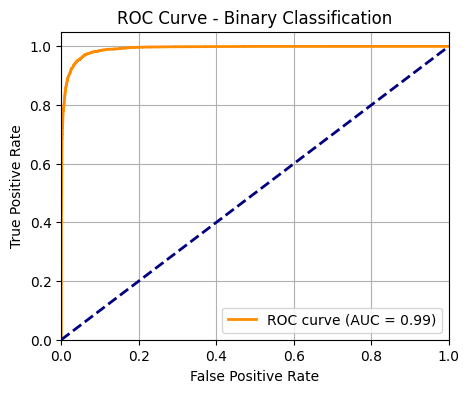

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels from the test set
y_true = test_generator.classes

# Predict probabilities from the model
y_pred_prob = loaded_model.predict(test_generator, verbose=1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
#prediction

In [ ]:
import os #directory operations
import numpy as np #array and matrices
import matplotlib.pyplot as plt #visualization
import tensorflow as tf #lib to build newral networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator #agumentation(fliping,rotating the images)
from tensorflow.keras.models import Sequential # stack of layers where each layer has one input and output
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout #cnn related
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint #earlystoping-stoping training if improvement not made,.............

In [ ]:
# Build the CNN model
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)
# Save history
import pickle
with open('Cnn.pkl', 'wb') as f:
    pickle.dump(history.history, f)

Epoch 1/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 660s 415ms/step - accuracy: 0.6855 - loss: 0.5780 - val_accuracy: 0.8532 - val_loss: 0.3698
Epoch 2/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 647s 406ms/step - accuracy: 0.7986 - loss: 0.4455 - val_accuracy: 0.8986 - val_loss: 0.2847
Epoch 3/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 642s 403ms/step - accuracy: 0.8439 - loss: 0.3591 - val_accuracy: 0.9261 - val_loss: 0.2053
Epoch 4/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 638s 401ms/step - accuracy: 0.8696 - loss: 0.3178 - val_accuracy: 0.9368 - val_loss: 0.1758
Epoch 5/5
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 646s 406ms/step - accuracy: 0.8879 - loss: 0.2806 - val_accuracy: 0.9271 - val_loss: 0.1811


In [ ]:
model.save("/content/drive/MyDrive/Cnn.h5")  # Save in Google Drive

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/Cnn.h5")
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,611 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Evaluate the model
loss, accuracy = loaded_model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')  #fstring for readability

531/531 ━━━━━━━━━━━━━━━━━━━━ 29s 54ms/step - accuracy: 0.9132 - loss: 0.1946
Test Accuracy: 93.93%


In [ ]:
import pickle
# Load history
with open('Cnn.pkl', 'rb') as f:
    history_data = pickle.load(f)

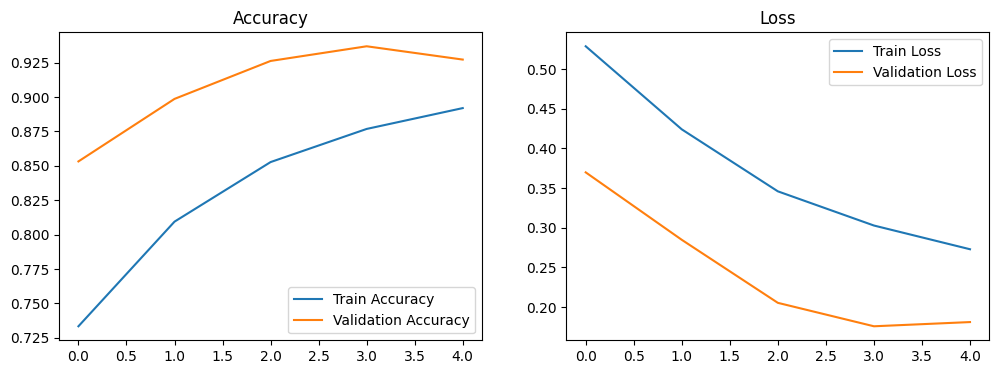

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
#prediction
#best preddiction code
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, model, class_indices):
    # Reverse class indices (e.g., {0:'awake', 1:'sleepy'})
    class_labels = {v: k for k, v in class_indices.items()}

    # Load and preprocess image
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))
    image_array = np.expand_dims(image_resized, axis=0) / 255.0  # normalize between 0 and 1

    # Predict
    prediction = model.predict(image_array)[0]
    predicted_class_index = int(np.round(prediction)[0])
    predicted_class = class_labels[predicted_class_index]

    # Correct confidence calculation
    if predicted_class_index == 1:
        confidence = prediction[0] * 100  # for 'sleepy'
    else:
        confidence = (1 - prediction[0]) * 100  # for 'awake'

    # Display image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)", fontsize=14)
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


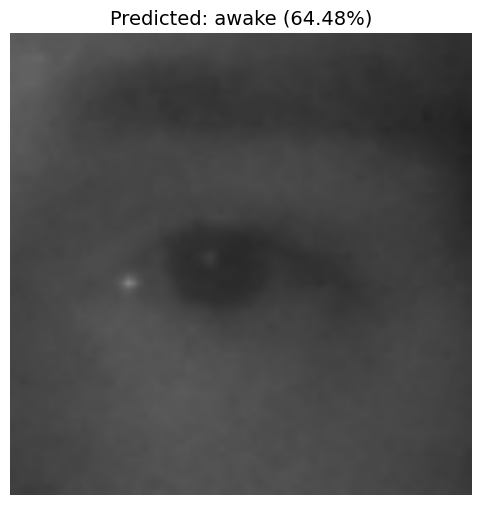

In [ ]:
image_path = "/content/data/test/awake/s0001_01876_0_0_1_0_0_01.png"
predict_image(image_path, loaded_model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


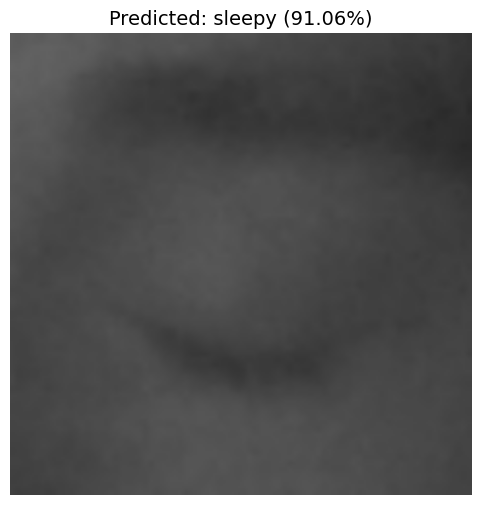

In [ ]:
predict_image("/content/data/test/sleepy/s0001_00012_0_0_0_0_0_01.png", loaded_model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


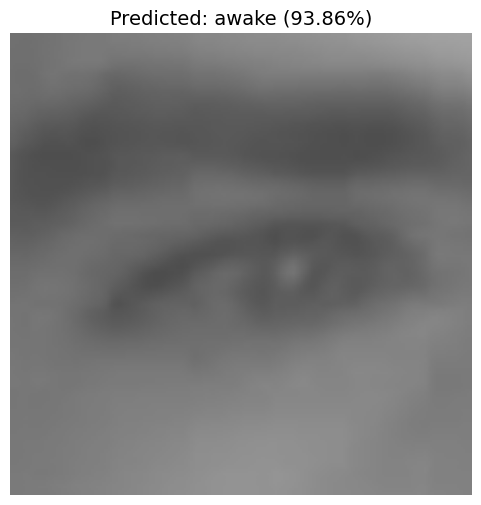

In [ ]:
predict_image("/content/data/test/awake/s0012_07464_0_0_1_0_1_01.png", loaded_model, train_generator.class_indices)

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 1: Get true labels
true_labels = test_generator.classes  # true class labels from the test set

# Step 2: Get model predictions
predictions = loaded_model.predict(test_generator)  # predict probabilities
predicted_labels = np.round(predictions).astype(int).flatten()  # convert probabilities to 0 or 1

# Step 3: Create reverse class_labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # e.g., {0:'awake', 1:'sleepy'}

# Step 4: Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=list(class_labels.values()))

# Step 5: Print the report
print(report)


531/531 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step
              precision    recall  f1-score   support

       awake       0.96      0.92      0.94      8591
      sleepy       0.92      0.96      0.94      8390

    accuracy                           0.94     16981
   macro avg       0.94      0.94      0.94     16981
weighted avg       0.94      0.94      0.94     16981



531/531 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step


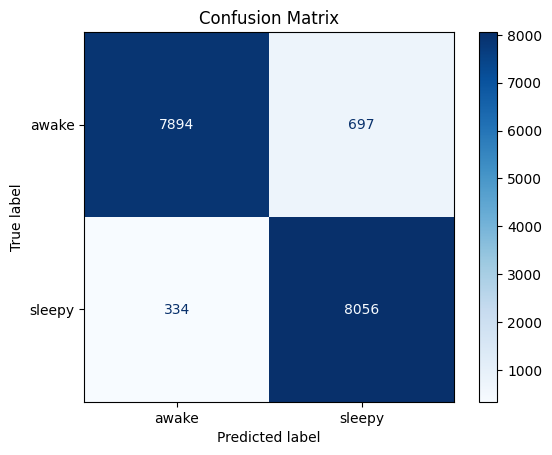

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: True and Predicted labels
true_labels = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_labels = np.round(predictions).astype(int).flatten()

# Step 2: Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 3: Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(train_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


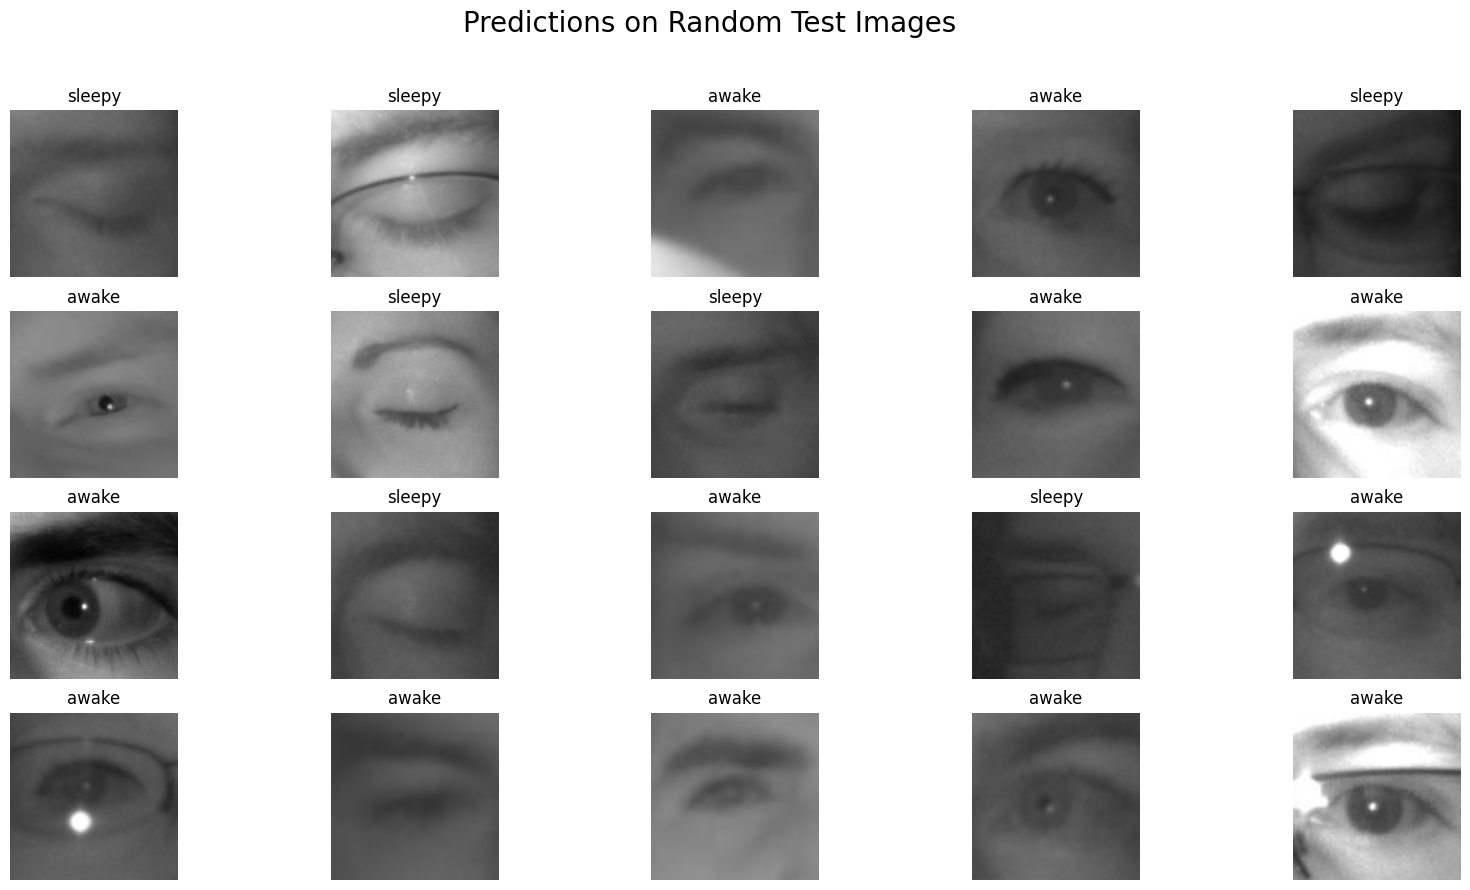

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get 20 random indices
num_images = 20
random_indices = np.random.choice(len(test_generator.filenames), num_images, replace=False)

# Step 2: Fetch the image file paths
image_paths = [test_generator.filepaths[i] for i in random_indices]

# Step 3: Predict each image
predicted_classes = []
true_classes = []
images = []

for img_path in image_paths:
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = np.expand_dims(img_resized, axis=0) / 255.0

    # Predict
    prediction = loaded_model.predict(img_normalized, verbose=0)[0]
    predicted_class_idx = np.round(prediction).astype(int)[0]
    predicted_classes.append(predicted_class_idx)

    images.append(img_resized)

# Step 4: Map indices to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # reverse mapping

# Step 5: Plot results
plt.figure(figsize=(20, 10))
for idx in range(num_images):
    plt.subplot(4, 5, idx + 1)
    plt.imshow(images[idx])
    plt.axis('off')
    predicted_label = class_labels[predicted_classes[idx]]
    plt.title(predicted_label)

plt.suptitle("Predictions on Random Test Images", fontsize=20)
plt.show()


531/531 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step


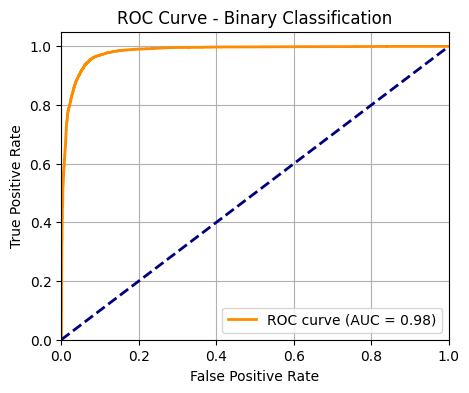

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels from the test set
y_true = test_generator.classes

# Predict probabilities from the model
y_pred_prob = loaded_model.predict(test_generator, verbose=1)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (random chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
#verify class labels

In [ ]:
import cv2

In [ ]:
img_array=cv2.imread("/content/data/train/awake/s0001_01842_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)

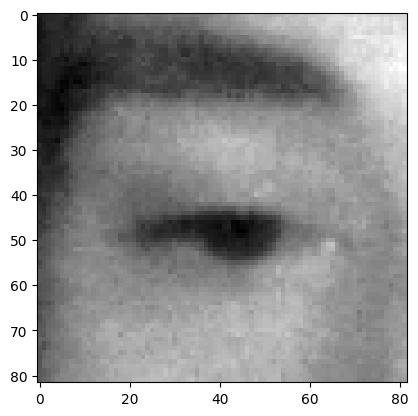

In [ ]:
plt.imshow(img_array,cmap="gray")

In [ ]:
img_array=cv2.imread("/content/data/train/sleepy/s0001_00294_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

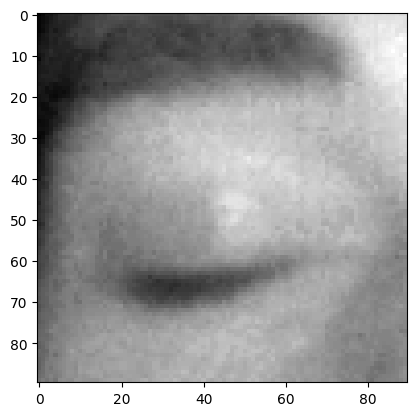

In [ ]:
plt.imshow(img_array,cmap="gray")

In [ ]:
def verify_label(filename):
    # Split the filename and extract the 5th element (index 4)
    index_4_value = int(filename.split('_')[4])

    # Print a message based on the value of index 4
    if index_4_value == 1:
        return "This image is '1 : Awake'."                  #when we ont have folders and assign lable
    else:
        return "This image is '0 : Sleepy'."

# Example usage:
filename_1 = 's0001_01842_0_0_1_0_0_01.png'
filename_2 = 's0001_00294_0_0_0_0_0_01.png'

print(verify_label(filename_1))  # Expected: Awake
print(verify_label(filename_2))  # Expected: Sleepy


This image is '1 : Awake'.
This image is '0 : Sleepy'.


In [ ]:
# Extract Label from Filename:
def extract_label_from_filename(filename):
    # Split filename by underscores
    parts = filename.split('_')
    # Extract the label from index 4 (assuming awake=1, sleepy=0)
    label = int(parts[4])
    if label == 1:
        return "Awake"
    else:
        return "Sleepy"

# Example usage:
filename = 's0001_01842_0_0_1_0_0_01.png'
label = extract_label_from_filename(filename)
print(f"The label for the image {filename} is: {label}")


The label for the image s0001_01842_0_0_1_0_0_01.png is: Awake
